<h4 style="font-size: 16px;"><b>Problem Statement</b></h4>
<p style="font-size: 14px">
    The following insights are expected from this project.
    <ul style="font-size: 14px; line-height: 2em">
        <li>1. Department wise performances</li>
        <li>2. Top 3 Important Factors effecting employee performance</li>
        <li>3. A trained model which can predict the employee performance based on factors as inputs. This will be used to hire employees</li>
        <li>4. Recommendations to improve the employee performance based on insights from analysis.</li>
</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_excel('./data/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
data

EmpNumber  Age  Gender EducationBackground MaritalStatus  \
0     E1001000   32    Male           Marketing        Single   
1     E1001006   47    Male           Marketing        Single   
2     E1001007   40    Male       Life Sciences       Married   
3     E1001009   41    Male     Human Resources      Divorced   
4     E1001010   60    Male           Marketing        Single   
...        ...  ...     ...                 ...           ...   
1195   E100992   27  Female             Medical      Divorced   
1196   E100993   37    Male       Life Sciences        Single   
1197   E100994   50    Male             Medical       Married   
1198   E100995   34  Female             Medical        Single   
1199   E100998   24  Female       Life Sciences        Single   

        EmpDepartment        EmpJobRole BusinessTravelFrequency  \
0               Sales   Sales Executive           Travel_Rarely   
1               Sales   Sales Executive           Travel_Rarely   
2               Sales   Sales Executive       Travel_Frequently   
3     Human Resources           Manager           Travel_Rarely   
4               Sales   Sales Executive           Travel_Rarely   
...               ...               ...                     ...   
1195            Sales   Sales Executive       Travel_Frequently   
1196      Development  Senior Developer           Travel_Rarely   
1197      Development  Senior Developer           Travel_Rarely   
1198     Data Science    Data Scientist           Travel_Rarely   
1199            Sales   Sales Executive           Travel_Rarely   

      DistanceFromHome  EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                   10                  3  ...                            4   
1                   14                  4  ...                            4   
2                    5                  4  ...                            3   
3                   10                  4  ...                            2   
4                   16                  4  ...                            4   
...                ...                ...  ...                          ...   
1195                 3                  1  ...                            2   
1196                10                  2  ...                            1   
1197                28                  1  ...                            3   
1198                 9                  3  ...                            2   
1199                 3                  2  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                             10                      2                   2   
1                             20                      2                   3   
2                             20                      2                   3   
3                             23                      2                   2   
4                             10                      1                   3   
...                          ...                    ...                 ...   
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                               10                             7   
1                                7                             7   
2                               18                            13   
3                               21                             6   
4                                2                             2   
...                            ...                           ...   
1195                             6           

In [4]:
data.head(5)

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...                            4   
2                  4  ...                            3   
3                  4  ...                            2   
4                  4  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                       0                     8         No                  3  
1                       1                     7         No                  3  
2                       1                    12         No                  4  
3                      12                     6         No                  3  
4                       2                     2         No                  3  

[5 rows x 28 columns]

In [5]:
data.tail(5)

EmpNumber  Age  Gender EducationBackground MaritalStatus EmpDepartment  \
1195   E100992   27  Female             Medical      Divorced         Sales   
1196   E100993   37    Male       Life Sciences        Single   Development   
1197   E100994   50    Male             Medical       Married   Development   
1198   E100995   34  Female             Medical        Single  Data Science   
1199   E100998   24  Female       Life Sciences        Single         Sales   

            EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
1195   Sales Executive       Travel_Frequently                 3   
1196  Senior Developer           Travel_Rarely                10   
1197  Senior Developer           Travel_Rarely                28   
1198    Data Scientist           Travel_Rarely                 9   
1199   Sales Executive           Travel_Rarely                 3   

      EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
1195                  1  ...                            2   
1196                  2  ...                            1   
1197                  1  ...                            3   
1198                  3  ...                            2   
1199                  2  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
1195                             6                             5   
1196                             1                             0   
1197                            20                             8   
1198                             8                             7   
1199                             2                             2   

     YearsSinceLastPromotion  YearsWithCurrManager  Attrition  \
1195                       0                     4         No   
1196                       0                     0         No   
1197                       3                     8         No   
1198                       7                     7         No   
1199                       2                     0        Yes   

      PerformanceRating  
1195                  4  
1196                  3  
1197                  3  
1198                  3  
1199                  2  

[5 rows x 28 columns]

In [6]:
rows, col = data.shape
print ("Dimensions of dataset: {}" . format (data.shape))
print ('Rows:', rows, '\nColumns:', col)

Dimensions of dataset: (1200, 28)
Rows: 1200 
Columns: 28


In [7]:
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [8]:
data.dtypes

EmpNumber                       object
Age                              int64
Gender                          object
EducationBackground             object
MaritalStatus                   object
EmpDepartment                   object
EmpJobRole                      object
BusinessTravelFrequency         object
DistanceFromHome                 int64
EmpEducationLevel                int64
EmpEnvironmentSatisfaction       int64
EmpHourlyRate                    int64
EmpJobInvolvement                int64
EmpJobLevel                      int64
EmpJobSatisfaction               int64
NumCompaniesWorked               int64
OverTime                        object
EmpLastSalaryHikePercent         int64
EmpRelationshipSatisfaction      int64
TotalWorkExperienceInYears       int64
TrainingTimesLastYear            int64
EmpWorkLifeBalance               int64
ExperienceYearsAtThisCompany     int64
ExperienceYearsInCurrentRole     int64
YearsSinceLastPromotion          int64
YearsWithCurrManager     

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [10]:
data.describe()

Age  DistanceFromHome  EmpEducationLevel  \
count  1200.000000       1200.000000         1200.00000   
mean     36.918333          9.165833            2.89250   
std       9.087289          8.176636            1.04412   
min      18.000000          1.000000            1.00000   
25%      30.000000          2.000000            2.00000   
50%      36.000000          7.000000            3.00000   
75%      43.000000         14.000000            4.00000   
max      60.000000         29.000000            5.00000   

       EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  \
count                 1200.000000    1200.000000        1200.000000   
mean                     2.715833      65.981667           2.731667   
std                      1.090599      20.211302           0.707164   
min                      1.000000      30.000000           1.000000   
25%                      2.000000      48.000000           2.000000   
50%                      3.000000      66.000000           3.000000   
75%                      4.000000      83.000000           3.000000   
max                      4.000000     100.000000           4.000000   

       EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
count  1200.000000         1200.000000         1200.000000   
mean      2.067500            2.732500            2.665000   
std       1.107836            1.100888            2.469384   
min       1.000000            1.000000            0.000000   
25%       1.000000            2.000000            1.000000   
50%       2.000000            3.000000            2.000000   
75%       3.000000            4.000000            4.000000   
max       5.000000            4.000000            9.000000   

       EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
count               1200.000000                  1200.000000   
mean                  15.222500                     2.725000   
std                    3.625918                     1.075642   
min                   11.000000                     1.000000   
25%                   12.000000                     2.000000   
50%                   14.000000                     3.000000   
75%                   18.000000                     4.000000   
max                   25.000000                     4.000000   

       TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
count                 1200.000000            1200.000000         1200.000000   
mean                    11.330000               2.785833            2.744167   
std                      7.797228               1.263446            0.699374   
min                      0.000000               0.000000            1.000000   
25%                      6.000000               2.000000            2.000000   
50%                     10.000000               3.000000            3.000000   
75%                     15.000000               3.000000            3.000000   
max                     40.000000               6.000000            4.000000   

       ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
count                   1200.000000                   1200.000000   
mean                       7.077500                      4.291667   
std                        6.236899                      3.613744   
min                        0.000000                      0.000000   
25%                        3.000000                      2.000000   
50%                        5.000000                      3.000000   
75%                       10.000000                      7.000000   
max                       40.000000                     18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  PerformanceRating  
count              1200.000000           1200.000000        1200.000000  
mean                  2.194167              4.105000           2.948333  
std                   3.221560              3.541576           0.518866  
min                   0.000000              0.000000           2.000

In [11]:
data.describe(include=['O']).T

count unique              top  freq
EmpNumber                1200   1200         E1001000     1
Gender                   1200      2             Male   725
EducationBackground      1200      6    Life Sciences   492
MaritalStatus            1200      3          Married   548
EmpDepartment            1200      6            Sales   373
EmpJobRole               1200     19  Sales Executive   270
BusinessTravelFrequency  1200      3    Travel_Rarely   846
OverTime                 1200      2               No   847
Attrition                1200      2               No  1022

In [12]:
data.nunique().to_frame().T

EmpNumber  Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
0       1200   43       2                    6              3              6   

   EmpJobRole  BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0          19                        3                29                  5   

   ...  EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0  ...                            4                          40   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      7                   4                            37   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                            19                       16   

   YearsWithCurrManager  Attrition  PerformanceRating  
0                    18          2                  3  

[1 rows x 28 columns]

In [13]:
numerical_column = []
catergorial_column = []

for column in data.columns:
    if column != 'Attrition':
        if data[column].dtype == 'object':
            catergorial_column.append(column)
        else:
            numerical_column.append(column)
        
print('Categorial columns', catergorial_column, '\n')
print('Numerical columns', numerical_column)

Categorial columns ['EmpNumber', 'Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime'] 

Numerical columns ['Age', 'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked', 'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear', 'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'PerformanceRating']


In [14]:
table_content = ''
# Loop through each categorical column
for cat_col in catergorial_column:
    # Get the normalized value counts
    value_counts = data[cat_col].value_counts(normalize=True)
    
    # Convert the value counts to a string with a header
    column_content = f"Column: {cat_col}\n{value_counts}\n\n"
    
    # Append this column's content to the table content
    table_content += column_content

# Print the final table content
print(table_content)

Column: EmpNumber
EmpNumber
E1001000    0.000833
E100346     0.000833
E100342     0.000833
E100341     0.000833
E100340     0.000833
              ...   
E1001718    0.000833
E1001717    0.000833
E1001716    0.000833
E1001713    0.000833
E100998     0.000833
Name: proportion, Length: 1200, dtype: float64

Column: Gender
Gender
Male      0.604167
Female    0.395833
Name: proportion, dtype: float64

Column: EducationBackground
EducationBackground
Life Sciences       0.410000
Medical             0.320000
Marketing           0.114167
Technical Degree    0.083333
Other               0.055000
Human Resources     0.017500
Name: proportion, dtype: float64

Column: MaritalStatus
MaritalStatus
Married     0.456667
Single      0.320000
Divorced    0.223333
Name: proportion, dtype: float64

Column: EmpDepartment
EmpDepartment
Sales                     0.310833
Development               0.300833
Research & Development    0.285833
Human Resources           0.045000
Finance                   0.040833

<h4 style="font-size: 16px;"><b>Exploratary Data Analysis</b></h4>

<h4 style="font-size: 16px;"><b>Univariate Data Analysis</b></h4>

In [15]:
categorial_data = data[['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime']]

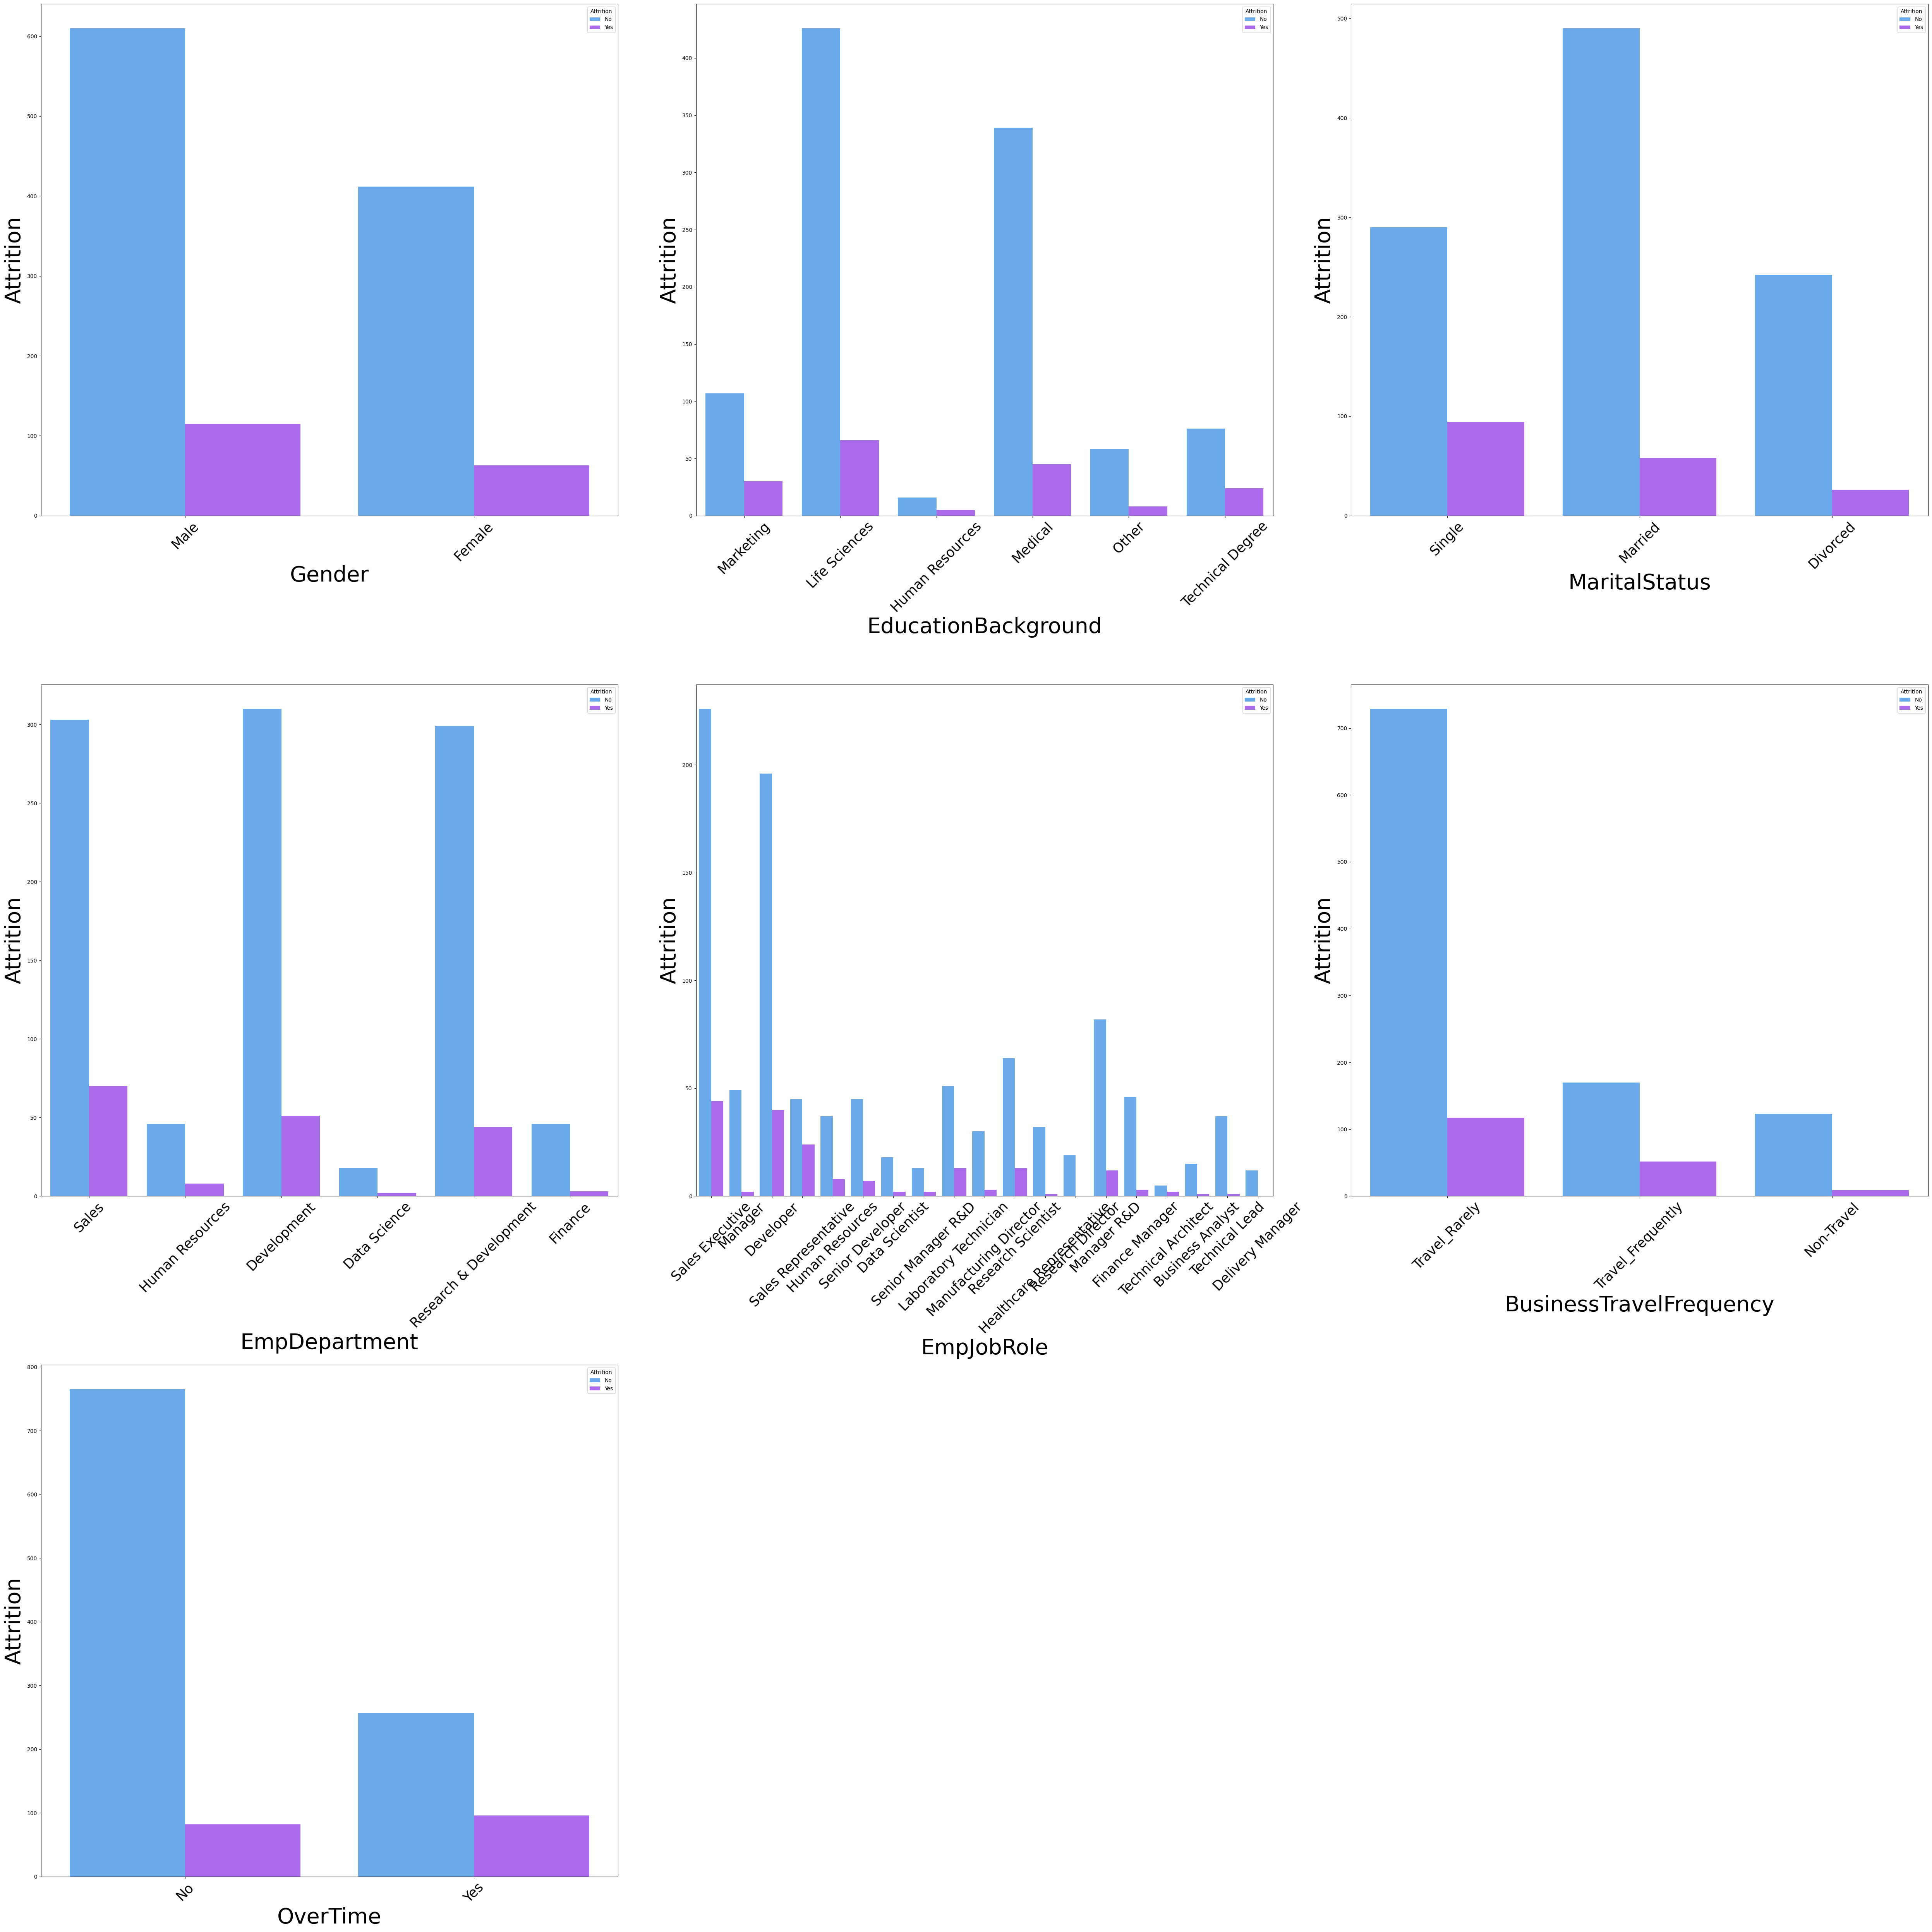

In [16]:
plt.figure(figsize=(50,50),facecolor='white')
plotnumber = 1

for column in categorial_data:
    if plotnumber <= len(categorial_data):
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(x=categorial_data[column].dropna(axis=0), hue=data.Attrition, palette='cool')
        plt.xlabel(column, fontsize=40)
        plt.ylabel('Attrition',fontsize=40)
        plt.xticks(fontsize=25,rotation=45)
    plotnumber += 1
plt.tight_layout()

In [17]:
numerical_data = data[['Age', 'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked', 'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear', 'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'PerformanceRating']]

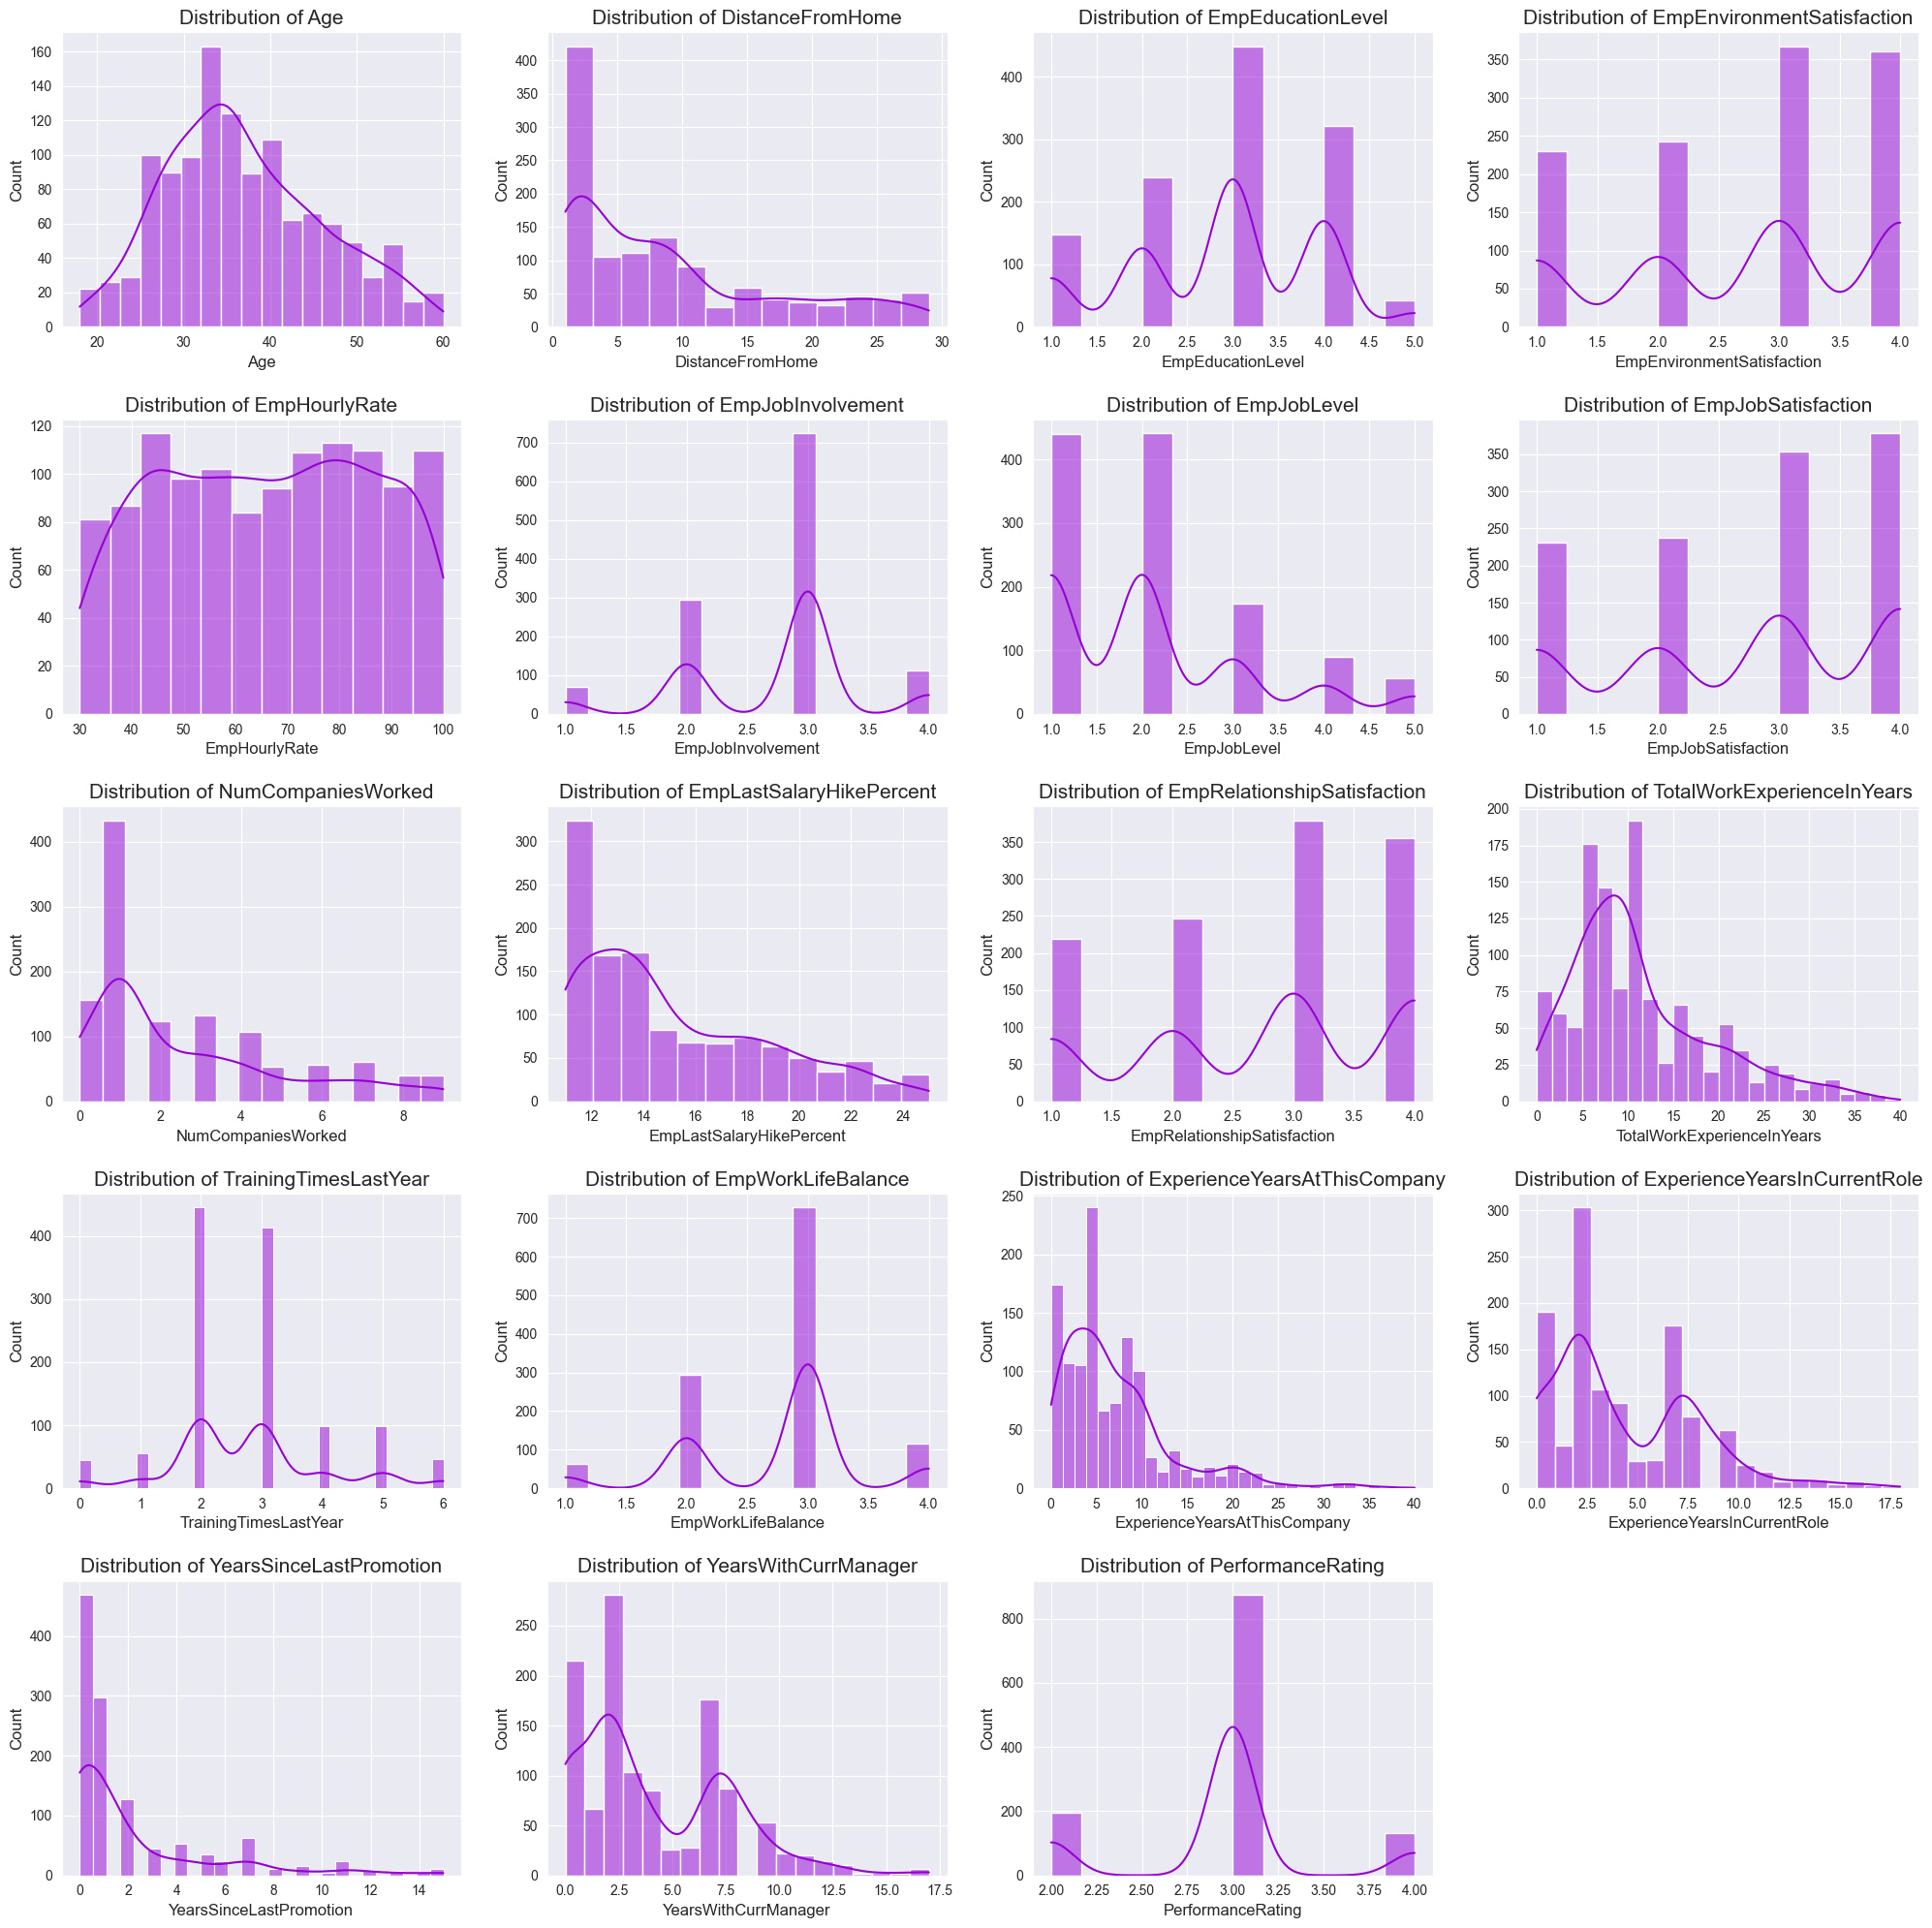

In [18]:
# histplot to analyse the distribution of continuous independent features
plt.figure(figsize= (20, 20))

sns.set_style('darkgrid')
plotnumber = 1

for column in numerical_data:
    if plotnumber <= len(numerical_column):
        ax= plt.subplot(5, 4, plotnumber)
        sns.histplot(x=numerical_data[column], color='darkviolet', kde=True)
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Count', fontsize= 12)
        plt.title(f'Distribution of {column}', fontsize= 15)
    plotnumber += 1
plt.tight_layout(h_pad=2, w_pad=2)
plt.show()

<h4 style="font-size: 16px;"><b>Bivariate Analysis</b></h4>

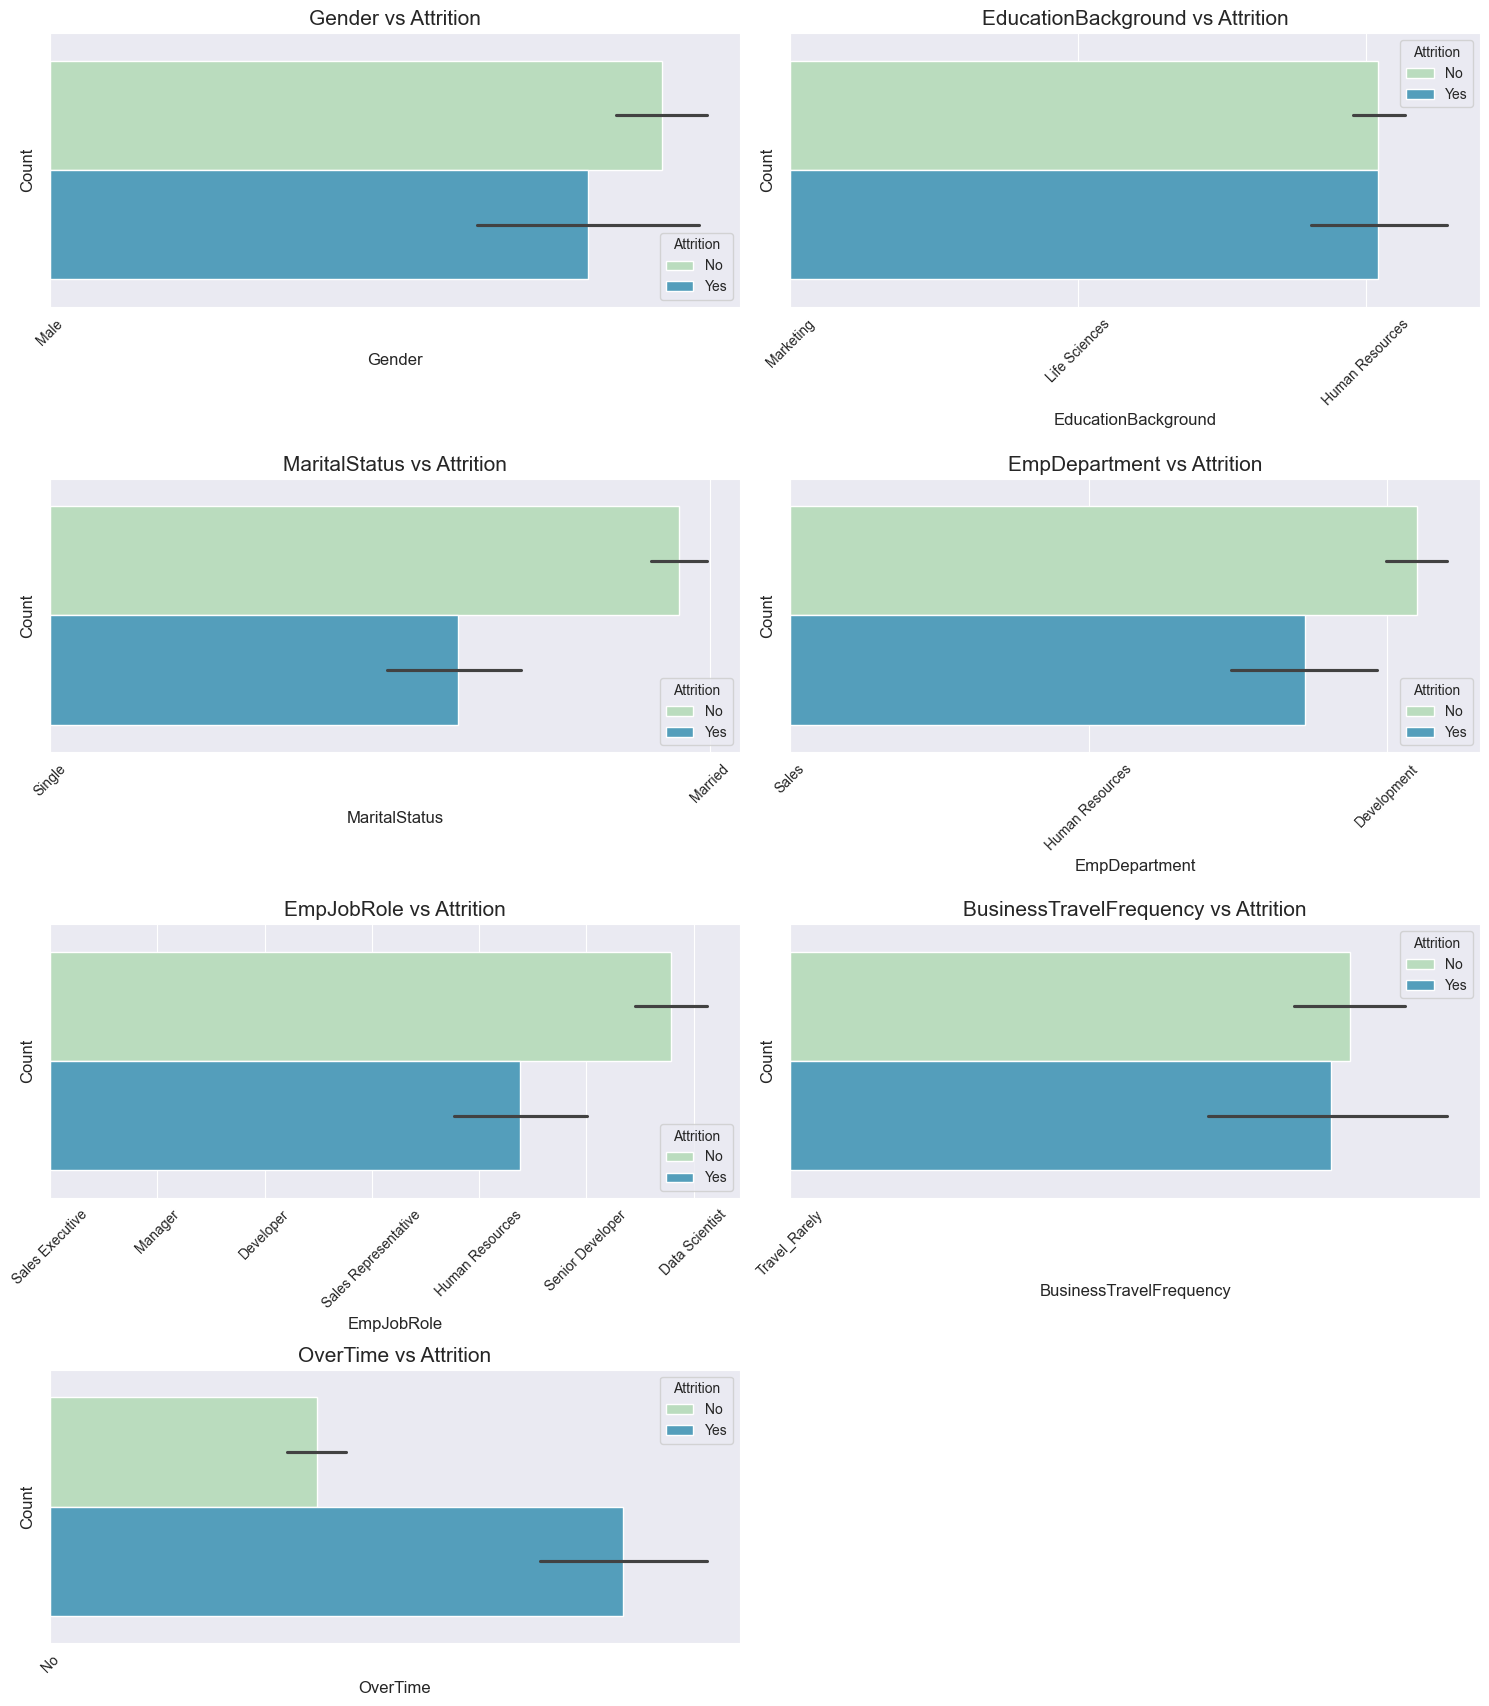

In [19]:
plt.figure(figsize=(15, 30), facecolor='white')
sns.set_style('darkgrid')
plotnumber = 1

for column in categorial_data:
    if plotnumber <= 14:
        ax = plt.subplot(7, 2, plotnumber)
        sns.barplot(x=column, hue='Attrition', data=data, palette='GnBu')
        plt.xlabel(column, fontsize=12)
        plt.xticks(rotation=45)
        plt.ylabel('Count', fontsize=12)
        plt.title(f'{column} vs Attrition', fontsize=15)
    plotnumber += 1

plt.tight_layout()
plt.show()

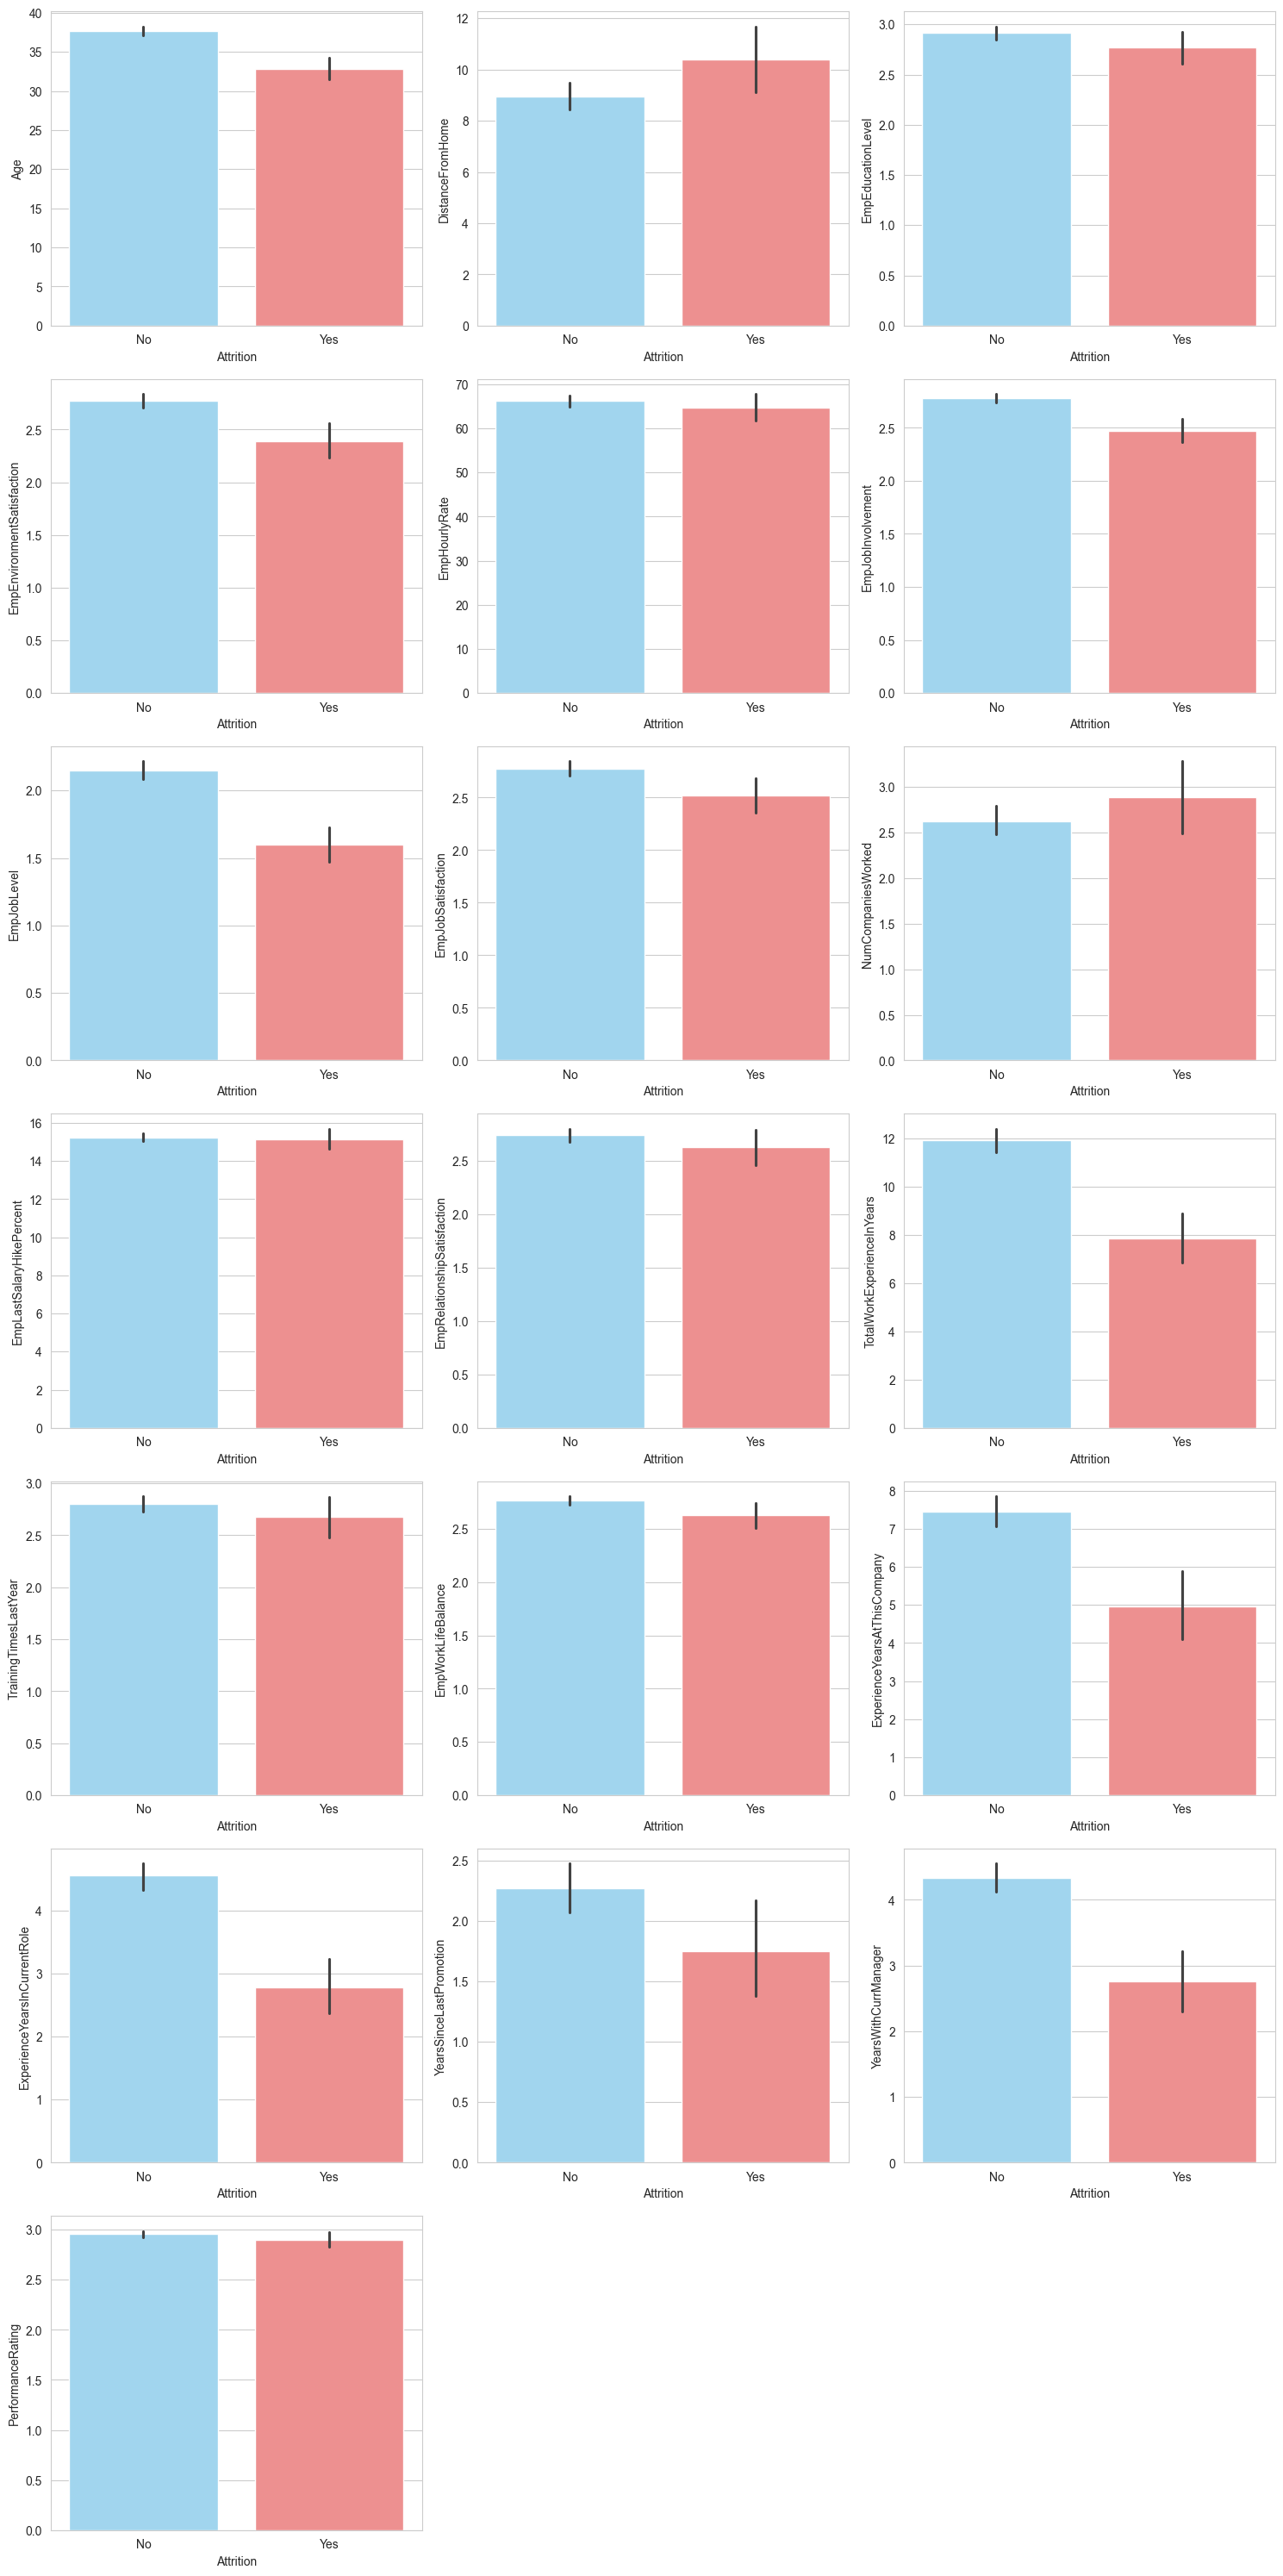

In [20]:
# Relationship between Numerical Columns and Attrition

plt.figure(figsize=(15, 30), facecolor='white')
sns.set_style('whitegrid')
custom_colors = ["#94DAFB", "#FD8080", "#8B75D7", '#6D848E']

# Calculate the number of rows needed for subplots based on the number of columns
n_cols = 3
n_rows = (len(numerical_data.columns) + n_cols - 1) // n_cols  # This ensures all plots fit

for i, column in enumerate(numerical_data.columns, 1):
    plt.subplot(n_rows, n_cols, i)  # Corrected to include subplot indexing
    sns.barplot(x=data['Attrition'].astype(str), y=data[column], palette=custom_colors)
    plt.ylabel(column, fontsize=10)
    plt.xlabel('Attrition')

plt.tight_layout()
plt.show()

<h4 style="font-size: 16px;"><b>Multivariate Analysis</b></h4>

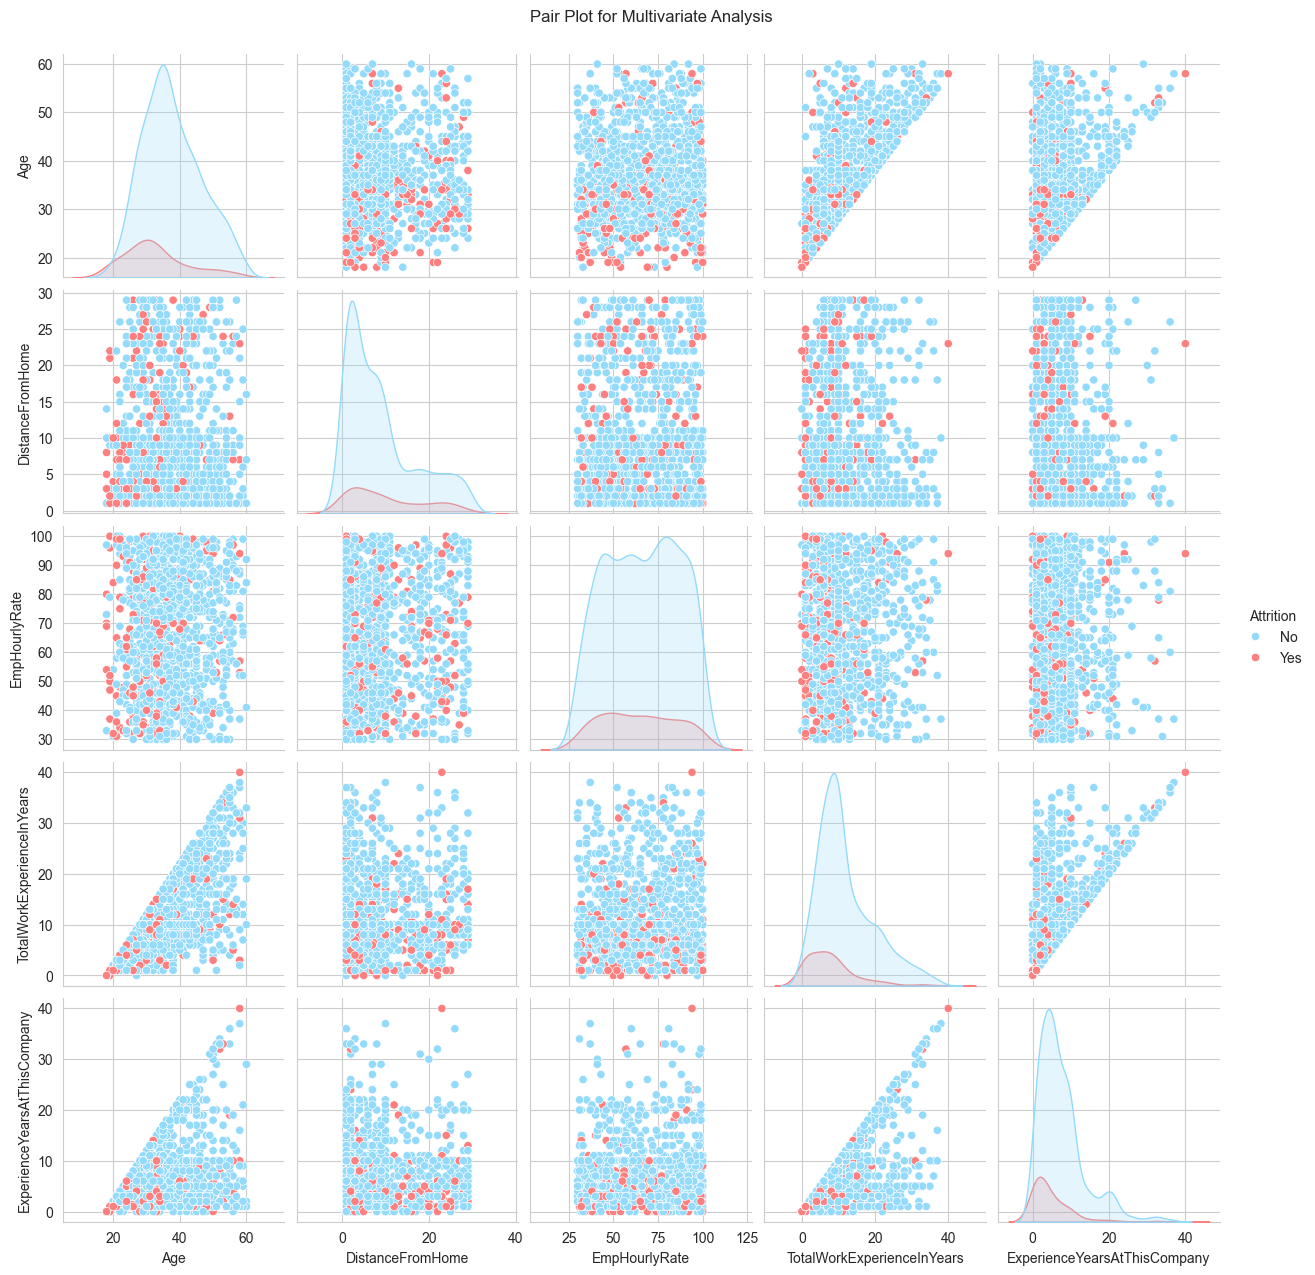

In [21]:
FEATURES = [col for col in data.columns if col != 'Attrition']
selected_columns = [col for col in FEATURES if data[col].nunique() >= 25]
custom_colors = ["#94DAFB", "#FD8080", "#8B75D7", '#6D848E']

# Combine selected columns with the target variable 'price_range'
selected_columns.append('Attrition')

# Create a DataFrame with the selected columns
selected_data = data[selected_columns]

# Use pairplot
sns.pairplot(selected_data, hue='Attrition', palette=custom_colors)
plt.suptitle('Pair Plot for Multivariate Analysis', y=1.02)
plt.show()

<h4 style="font-size: 16px;"><b>Data Preprocessing</b></h4>

In [22]:
data.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [23]:
data.duplicated().sum()

0

In [24]:
len(numerical_column)

19

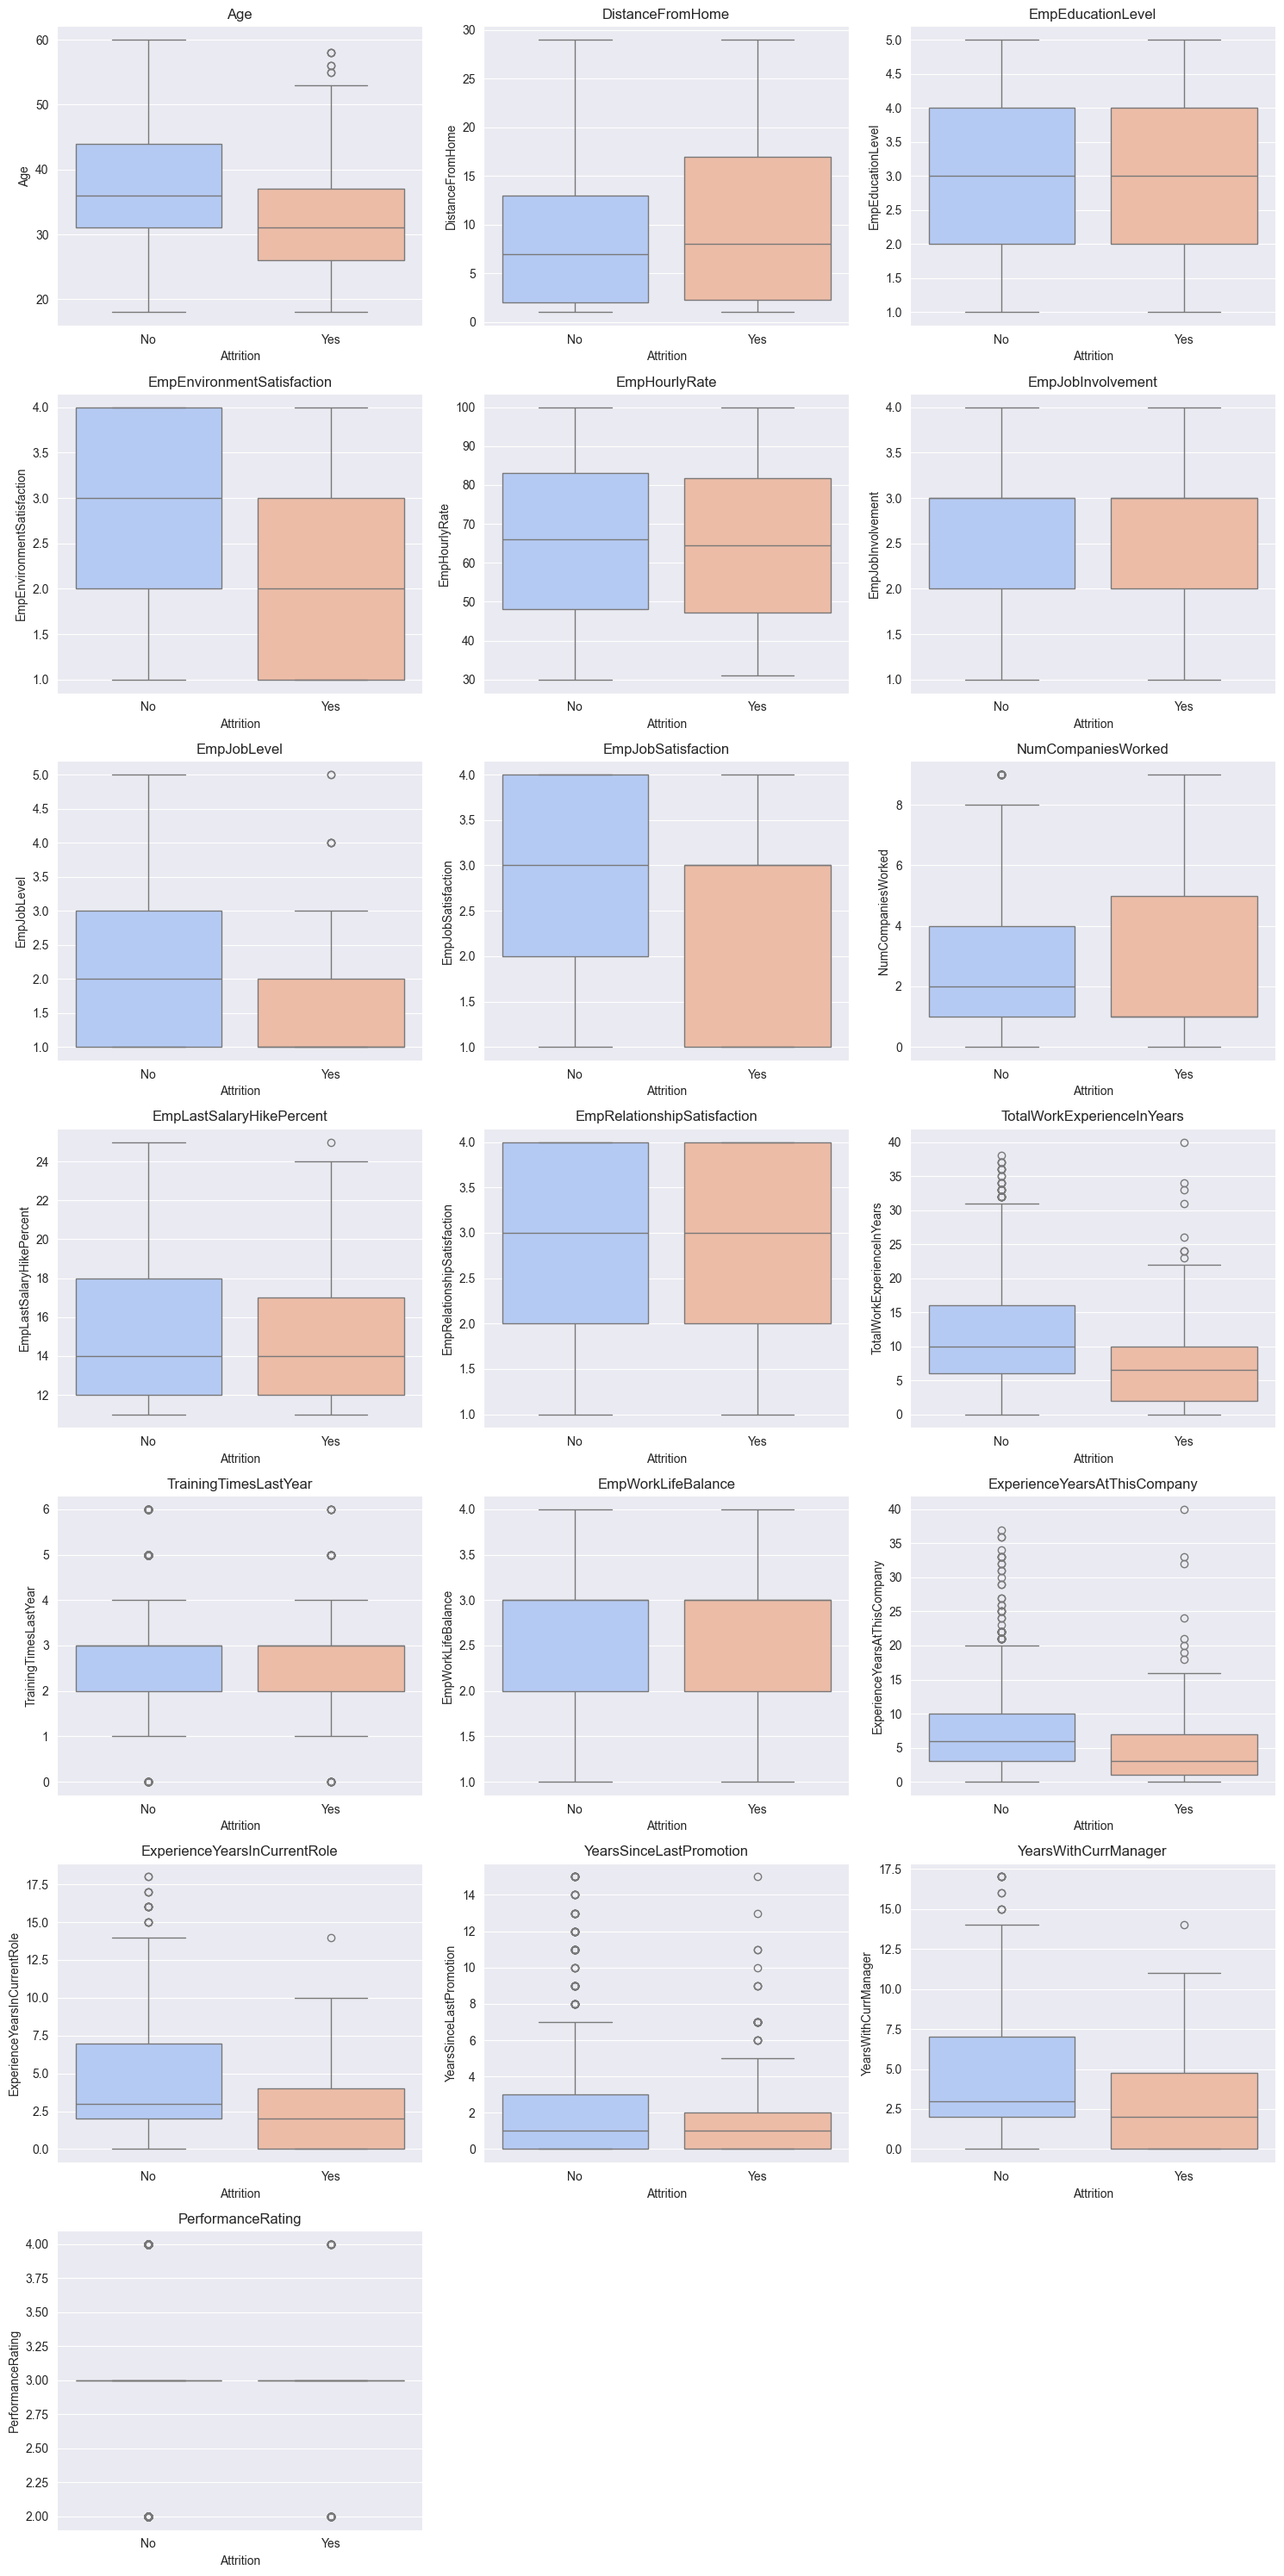

In [25]:
# check for outliers using Boxplot
plt.figure(figsize= (15, 30))
sns.set_style('darkgrid')
n_cols = 3
n_rows = (len(numerical_data.columns) + n_cols - 1) // n_cols
plotnumber=1

for column in numerical_column:
    if plotnumber<=len(numerical_column):
        ax= plt.subplot(n_rows, n_cols, plotnumber)
        sns.boxplot(data= data, x= data['Attrition'], y= column, palette= 'coolwarm')
        ax.set_title(f'{column}')
      
    plotnumber+=1
plt.tight_layout()
plt.show()

In [26]:
numerical_column

['Age',
 'DistanceFromHome',
 'EmpEducationLevel',
 'EmpEnvironmentSatisfaction',
 'EmpHourlyRate',
 'EmpJobInvolvement',
 'EmpJobLevel',
 'EmpJobSatisfaction',
 'NumCompaniesWorked',
 'EmpLastSalaryHikePercent',
 'EmpRelationshipSatisfaction',
 'TotalWorkExperienceInYears',
 'TrainingTimesLastYear',
 'EmpWorkLifeBalance',
 'ExperienceYearsAtThisCompany',
 'ExperienceYearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'PerformanceRating']

In [27]:
outliers_col = data[['Age', 'EmpJobLevel', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'PerformanceRating']]

Q1 = outliers_col.quantile(0.25)
Q3 = outliers_col.quantile(0.75)
IQR = Q3 - Q1

outliers = ((outliers_col < (Q1 - 1.5 * IQR)) | (outliers_col > (Q3 + 1.5 * IQR)))

number_of_outliers = outliers.sum()

number_of_outliers.to_frame().T

Age  EmpJobLevel  TotalWorkExperienceInYears  TrainingTimesLastYear  \
0    0            0                          51                    188   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            56                            16   

   YearsSinceLastPromotion  YearsWithCurrManager  PerformanceRating  
0                       88                    11                326

<h4 style="font-size: 16px"><b>Cleaning Outliers</b></h4>

<h4 style="font-size: 16px"><b>Hadling the outliers for TotalWorkExperienceInYears column</b></h4>

In [28]:
# Hadling the outliers for TotalWorkExperienceInYears column

q1 = data['TotalWorkExperienceInYears'].quantile(0.25)
q3 = data['TotalWorkExperienceInYears'].quantile(0.75)
iqr = q3 - q1

upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

print('Upper bound', '\033[1m', upper_bound, 'and lower bound', '\033[1m',lower_bound)

Upper bound  28.5 and lower bound  -7.5


In [29]:
data.loc[data['TotalWorkExperienceInYears'] < lower_bound]

Empty DataFrame
Columns: [EmpNumber, Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 28 columns]

In [30]:
data.loc[data['TotalWorkExperienceInYears'] > upper_bound]

EmpNumber  Age  Gender EducationBackground MaritalStatus  \
17    E1001040   56    Male             Medical       Married   
25    E1001054   52    Male           Marketing       Married   
48    E1001093   50    Male             Medical       Married   
72    E1001129   51  Female           Marketing       Married   
77    E1001140   53  Female           Marketing       Married   
96    E1001179   53  Female       Life Sciences        Single   
100   E1001183   50    Male       Life Sciences      Divorced   
149   E1001275   50    Male             Medical      Divorced   
173   E1001310   59  Female       Life Sciences        Single   
178   E1001316   52  Female           Marketing       Married   
192   E1001339   50    Male             Medical       Married   
199   E1001352   55    Male             Medical        Single   
277   E1001493   50  Female             Medical       Married   
292   E1001523   54  Female       Life Sciences      Divorced   
295   E1001528   54    Male       Life Sciences       Married   
308   E1001556   55    Male             Medical      Divorced   
312   E1001560   51    Male       Life Sciences      Divorced   
342   E1001616   56    Male       Life Sciences        Single   
347   E1001630   51    Male       Life Sciences      Divorced   
351   E1001638   58  Female             Medical       Married   
356   E1001645   51  Female    Technical Degree        Single   
361   E1001651   56    Male       Life Sciences       Married   
387   E1001700   54  Female             Medical        Single   
388   E1001701   58  Female             Medical       Married   
424   E1001762   49    Male       Life Sciences      Divorced   
450   E1001817   50    Male             Medical        Single   
471   E1001850   53  Female    Technical Degree       Married   
475   E1001856   55    Male           Marketing       Married   
490   E1001884   50    Male             Medical       Married   
525   E1001939   49  Female       Life Sciences       Married   
528   E1001943   54  Female             Medical       Married   
589   E1002048   55    Male             Medical       Married   
615   E1002102   58    Male             Medical      Divorced   
642   E1002145   48    Male       Life Sciences       Married   
678   E1002216   58  Female       Life Sciences       Married   
703   E1002251   55    Male     Human Resources       Married   
777    E100301   53  Female       Life Sciences       Married   
816    E100358   50  Female             Medical      Divorced   
845    E100409   58    Male             Medical        Single   
867    E100443   58  Female             Medical       Married   
921    E100537   52    Male       Life Sciences       Married   
958    E100601   50  Female             Medical      Divorced   
962    E100607   52    Male       Life Sciences        Single   
989    E100652   55    Male             Medical        Single   
1077   E100783   55  Female       Life Sciences        Single   
1101   E100824   52  Female       Life Sciences       Married   
1104   E100827   60  Female       Life Sciences       Married   
1116   E100846   57    Male           Marketing      Divorced   
1135   E100875   55  Female       Life Sciences        Single   
1156   E100916   49    Male       Life Sciences      Divorced   
1160   E100922   50    Male             Medical       Married   

               EmpDepartment                 EmpJobRole  \
17               Development                  Developer   
25                     Sales                    Manager   
48               Development                  Developer   
72                     Sales                    Manager   
77                     Sales            Sales Executive   
96               Development                  Developer   
100              Development                  Developer   
149              Development           Senior Developer   
173   Research & Development     Manufacturing Director   
178                    Sales      

In [31]:
data.loc[data['TotalWorkExperienceInYears'] > upper_bound, 'TotalWorkExperienceInYears'] = np.median(data['TotalWorkExperienceInYears'])

In [32]:
data.loc[data['TotalWorkExperienceInYears'] > upper_bound]

Empty DataFrame
Columns: [EmpNumber, Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 28 columns]

<h4 style="font-size: 16px"><b>Handle outliers for ExperienceYearsAtThisCompany</b></h4>

In [33]:
# ExperienceYearsAtThisCompany

q1 = data['ExperienceYearsAtThisCompany'].quantile(0.25)
q3 = data['ExperienceYearsAtThisCompany'].quantile(0.75)
iqr = q3 - q1

lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

outliers= (data['ExperienceYearsAtThisCompany'] < lower_limit) | (data['ExperienceYearsAtThisCompany'] > upper_limit)
outliers_percent= (outliers.sum() / (len(data))) * 100
outliers_percent 

4.666666666666667

In [34]:
data.loc[data['ExperienceYearsAtThisCompany'] < lower_limit]

Empty DataFrame
Columns: [EmpNumber, Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 28 columns]

In [35]:
data.loc[data['ExperienceYearsAtThisCompany'] > upper_limit]

EmpNumber  Age  Gender EducationBackground MaritalStatus  \
3     E1001009   41    Male     Human Resources      Divorced   
11    E1001024   47  Female             Medical      Divorced   
25    E1001054   52    Male           Marketing       Married   
52    E1001098   47  Female               Other       Married   
100   E1001183   50    Male       Life Sciences      Divorced   
168   E1001304   39  Female       Life Sciences       Married   
175   E1001313   41  Female       Life Sciences      Divorced   
178   E1001316   52  Female           Marketing       Married   
181   E1001321   39  Female             Medical        Single   
216   E1001387   42    Male             Medical       Married   
252   E1001445   42    Male       Life Sciences        Single   
272   E1001482   46  Female           Marketing       Married   
304   E1001545   44    Male           Marketing       Married   
307   E1001555   45  Female           Marketing        Single   
308   E1001556   55    Male             Medical      Divorced   
312   E1001560   51    Male       Life Sciences      Divorced   
316   E1001566   44    Male       Life Sciences      Divorced   
320   E1001571   43  Female           Marketing        Single   
347   E1001630   51    Male       Life Sciences      Divorced   
450   E1001817   50    Male             Medical        Single   
459   E1001828   40    Male             Medical        Single   
471   E1001850   53  Female    Technical Degree       Married   
475   E1001856   55    Male           Marketing       Married   
490   E1001884   50    Male             Medical       Married   
492   E1001886   44  Female             Medical      Divorced   
555   E1001990   45    Male       Life Sciences       Married   
557   E1001997   45  Female    Technical Degree        Single   
571   E1002018   40    Male             Medical        Single   
613   E1002093   41  Female           Marketing      Divorced   
617   E1002105   47  Female       Life Sciences      Divorced   
642   E1002145   48    Male       Life Sciences       Married   
658   E1002178   48  Female             Medical      Divorced   
777    E100301   53  Female       Life Sciences       Married   
785    E100314   44  Female             Medical       Married   
816    E100358   50  Female             Medical      Divorced   
817    E100359   59  Female       Life Sciences        Single   
838    E100397   40    Male       Life Sciences       Married   
845    E100409   58    Male             Medical        Single   
862    E100436   43    Male       Life Sciences       Married   
867    E100443   58  Female             Medical       Married   
911    E100522   46  Female           Marketing      Divorced   
921    E100537   52    Male       Life Sciences       Married   
956    E100597   42    Male    Technical Degree       Married   
962    E100607   52    Male       Life Sciences        Single   
978    E100630   40    Male             Medical      Divorced   
989    E100652   55    Male             Medical        Single   
1015   E100688   41    Male       Life Sciences        Single   
1024   E100703   45    Male       Life Sciences      Divorced   
1027   E100707   39    Male             Medical       Married   
1036   E100722   39    Male             Medical       Married   
1086   E100798   43    Male       Life Sciences      Divorced   
1094   E100809   39    Male       Life Sciences      Divorced   
1104   E100827   60  Female       Life Sciences       Married   
1117   E100847   50    Male       Life Sciences       Married   
1156   E100916   49    Male       Life Sciences      Divorced   
1160   E100922   50    Male             Medical       Married   

               EmpDepartment                 EmpJobRole  \
3            Human Resources                    Manager   
11                     Sales            Sales Executive   
25                     Sales                    Manager   
52               Development                  Developer   
100 

In [36]:
data.loc[data['ExperienceYearsAtThisCompany'] > upper_limit, 'ExperienceYearsAtThisCompany'] = np.median(data['ExperienceYearsAtThisCompany'])

In [37]:
data.loc[data['ExperienceYearsAtThisCompany'] > upper_limit]

Empty DataFrame
Columns: [EmpNumber, Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 28 columns]

<h4 style="font-size: 16px"><b>Handle outliers for TrainingTimesLastYear</b></h4>

In [38]:
# TrainingTimesLastYear

q1 = data['TrainingTimesLastYear'].quantile(0.25)
q3 = data['TrainingTimesLastYear'].quantile(0.75)
iqr = q3 - q1

lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

outliers = (data['TrainingTimesLastYear'] < lower_limit) | (data['TrainingTimesLastYear'] > upper_limit)
outliers_percent = (outliers.sum() / (len(data))) * 100
outliers_percent 

15.666666666666668

In [39]:
data.loc[data['TrainingTimesLastYear'] < lower_limit]

EmpNumber  Age  Gender EducationBackground MaritalStatus  \
55    E1001104   35  Female       Life Sciences        Single   
96    E1001179   53  Female       Life Sciences        Single   
104   E1001191   44    Male       Life Sciences       Married   
144   E1001269   31    Male             Medical        Single   
153   E1001281   47  Female       Life Sciences        Single   
156   E1001284   38    Male             Medical       Married   
165   E1001300   48    Male       Life Sciences        Single   
215   E1001385   26    Male             Medical      Divorced   
232   E1001411   36    Male       Life Sciences        Single   
242   E1001434   18    Male             Medical        Single   
247   E1001440   27    Male       Life Sciences       Married   
333   E1001590   36  Female    Technical Degree       Married   
343   E1001618   40    Male       Life Sciences      Divorced   
344   E1001622   34    Male       Life Sciences      Divorced   
351   E1001638   58  Female             Medical       Married   
358   E1001647   35  Female             Medical       Married   
361   E1001651   56    Male       Life Sciences       Married   
363   E1001653   40  Female             Medical      Divorced   
368   E1001665   28    Male       Life Sciences       Married   
411   E1001745   34  Female    Technical Degree       Married   
414   E1001751   49    Male    Technical Degree       Married   
482   E1001868   29    Male       Life Sciences      Divorced   
487   E1001877   43    Male    Technical Degree      Divorced   
516   E1001925   27  Female             Medical       Married   
517   E1001926   27    Male             Medical        Single   
575   E1002025   30  Female     Human Resources      Divorced   
615   E1002102   58    Male             Medical      Divorced   
667   E1002194   31  Female             Medical      Divorced   
680   E1002218   38    Male       Life Sciences      Divorced   
703   E1002251   55    Male     Human Resources       Married   
762   E1002342   27    Male       Life Sciences       Married   
765    E100279   41  Female       Life Sciences        Single   
798    E100334   27    Male       Life Sciences        Single   
822    E100368   36    Male             Medical       Married   
842    E100403   32    Male             Medical        Single   
876    E100456   36    Male             Medical      Divorced   
932    E100553   49    Male       Life Sciences      Divorced   
979    E100631   51    Male       Life Sciences       Married   
981    E100639   38    Male       Life Sciences       Married   
1002   E100670   44    Male       Life Sciences      Divorced   
1008   E100679   26    Male           Marketing        Single   
1034   E100717   32  Female             Medical        Single   
1040   E100727   27    Male           Marketing       Married   
1068   E100772   21  Female       Life Sciences        Single   

               EmpDepartment                 EmpJobRole  \
55               Development           Senior Developer   
96               Development                  Developer   
104              Development                  Developer   
144              Development                  Developer   
153                    Sales            Sales Executive   
156   Research & Development         Senior Manager R&D   
165   Research & Development  Healthcare Representative   
215   Research & Development                Manager R&D   
232   Research & Development     Manufacturing Director   
242   Research & Development      Laboratory Technician   
247   Research & Development         Research Scientist   
333   Research & Development  Healthcare Representative   
343   Research & Development         Research Scientist   
344   Research & Development  Healthcare Representative   
351   Research & Development     Manufacturing Director   
358   Research & Development      Laboratory Technician   
361   Research & Development                Manager R&D   
363   Research & 

In [40]:
data.loc[data['TrainingTimesLastYear'] > upper_limit]

EmpNumber  Age  Gender EducationBackground MaritalStatus EmpDepartment  \
10    E1001022   44    Male             Medical        Single   Development   
13    E1001027   29    Male       Life Sciences        Single         Sales   
27    E1001059   25  Female             Medical        Single         Sales   
31    E1001064   34    Male               Other        Single         Sales   
59    E1001110   40    Male             Medical        Single   Development   
...        ...  ...     ...                 ...           ...           ...   
1158   E100919   26    Male           Marketing       Married         Sales   
1166   E100933   27  Female             Medical      Divorced   Development   
1184   E100968   29  Female             Medical       Married         Sales   
1188   E100979   20    Male             Medical        Single   Development   
1193   E100988   29    Male       Life Sciences      Divorced   Development   

                EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
10               Developer              Non-Travel                24   
13    Sales Representative           Travel_Rarely                10   
27         Sales Executive           Travel_Rarely                26   
31         Sales Executive           Travel_Rarely                 2   
59               Developer       Travel_Frequently                16   
...                    ...                     ...               ...   
1158       Sales Executive           Travel_Rarely                28   
1166             Developer           Travel_Rarely                 6   
1184       Sales Executive           Travel_Rarely                 3   
1188      Senior Developer           Travel_Rarely                10   
1193             Developer       Travel_Frequently                 1   

      EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
10                    3  ...                            3   
13                    3  ...                            3   
27                    1  ...                            2   
31                    3  ...                            3   
59                    4  ...                            4   
...                 ...  ...                          ...   
1158                  2  ...                            4   
1166                  4  ...                            3   
1184                  2  ...                            1   
1188                  1  ...                            4   
1193                  4  ...                            4   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
10                             9                      5                   3   
13                             1                      6                   3   
27                             6                      5                   2   
31                             6                      5                   3   
59                            10                      6                   3   
...                          ...                    ...                 ...   
1158                           6                      5                   4   
1166                           6                      5                   2   
1184                           6                      5                   2   
1188                           1                      5                   3   
1193                          10                      5                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
10                               5                             2   
13                               1                             0   
27                               6                             5   
31                               6                             5   
59                               1                             0   
...                            ...                           ...   
1158                             

In [41]:
data.loc[data['TrainingTimesLastYear'] > upper_limit, 'TrainingTimesLastYear'] = np.median(data['TrainingTimesLastYear'])

In [42]:
data.loc[data['TrainingTimesLastYear'] < lower_limit, 'TrainingTimesLastYear'] = np.median(data['TrainingTimesLastYear'])

In [43]:
data.loc[data['TrainingTimesLastYear'] > upper_limit]

Empty DataFrame
Columns: [EmpNumber, Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 28 columns]

In [44]:
data.loc[data['TrainingTimesLastYear'] < lower_limit]

Empty DataFrame
Columns: [EmpNumber, Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 28 columns]

<h4 style="font-size: 16px"><b>Hadling the outliers for ExperienceYearsInCurrentRole column</b></h4>

In [45]:
# Hadling the outliers for TotalWorkExperienceInYears column

q1 = data['ExperienceYearsInCurrentRole'].quantile(0.25)
q3 = data['ExperienceYearsInCurrentRole'].quantile(0.75)
iqr = q3 - q1

upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

print('Upper bound', '\033[1m', upper_bound, 'and lower bound', '\033[1m',lower_bound)

Upper bound  14.5 and lower bound  -5.5


In [46]:
data.loc[data['ExperienceYearsInCurrentRole'] < lower_bound]

Empty DataFrame
Columns: [EmpNumber, Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 28 columns]

In [47]:
data.loc[data['ExperienceYearsInCurrentRole'] > upper_bound]

EmpNumber  Age  Gender EducationBackground MaritalStatus  \
151   E1001277   41    Male             Medical      Divorced   
175   E1001313   41  Female       Life Sciences      Divorced   
272   E1001482   46  Female           Marketing       Married   
361   E1001651   56    Male       Life Sciences       Married   
501   E1001899   35    Male       Life Sciences       Married   
555   E1001990   45    Male       Life Sciences       Married   
639   E1002141   46  Female    Technical Degree      Divorced   
658   E1002178   48  Female             Medical      Divorced   
730   E1002293   38  Female             Medical       Married   
817    E100359   59  Female       Life Sciences        Single   
864    E100440   51    Male       Life Sciences        Single   
921    E100537   52    Male       Life Sciences       Married   
956    E100597   42    Male    Technical Degree       Married   
999    E100665   42    Male       Life Sciences       Married   
1109   E100836   40  Female       Life Sciences       Married   
1152   E100903   41  Female       Life Sciences       Married   

               EmpDepartment         EmpJobRole BusinessTravelFrequency  \
151              Development          Developer       Travel_Frequently   
175   Research & Development  Research Director              Non-Travel   
272                    Sales            Manager           Travel_Rarely   
361   Research & Development        Manager R&D           Travel_Rarely   
501                  Finance    Finance Manager           Travel_Rarely   
555   Research & Development        Manager R&D              Non-Travel   
639                    Sales    Sales Executive           Travel_Rarely   
658   Research & Development            Manager       Travel_Frequently   
730   Research & Development  Research Director           Travel_Rarely   
817                    Sales    Sales Executive           Travel_Rarely   
864              Development          Developer           Travel_Rarely   
921              Development          Developer           Travel_Rarely   
956              Development          Developer           Travel_Rarely   
999                    Sales    Sales Executive           Travel_Rarely   
1109                   Sales            Manager           Travel_Rarely   
1152                   Sales            Manager           Travel_Rarely   

      DistanceFromHome  EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
151                  9                  3  ...                            2   
175                  7                  1  ...                            2   
272                  2                  3  ...                            1   
361                 23                  3  ...                            1   
501                 18                  5  ...                            4   
555                  1                  1  ...                            4   
639                  3                  3  ...                            4   
658                 22                  3  ...                            2   
730                 10                  3  ...                            1   
817                 25                  3  ...                            4   
864                  6                  3  ...                            3   
921                  1                  4  ...                            1   
956                  4                  2  ...                            4   
999                  1                  1  ...                            3   
1109                 2                  4  ...                            4   
1152                 2                  5  ...                            2   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
151                           21                      2                   4   
175                           21                      3                   3   
272                           28          

In [48]:
data.loc[data['ExperienceYearsInCurrentRole'] > upper_bound, 'ExperienceYearsInCurrentRole'] = np.median(data['ExperienceYearsInCurrentRole'])

In [49]:
data.loc[data['ExperienceYearsInCurrentRole'] > upper_bound]

Empty DataFrame
Columns: [EmpNumber, Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 28 columns]

<h4 style="font-size: 16px"><b>Hadling the outliers for YearsSinceLastPromotion column</b></h4>

In [50]:
q1 = data['YearsSinceLastPromotion'].quantile(0.25)
q3 = data['YearsSinceLastPromotion'].quantile(0.75)
iqr = q3 - q1

upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

print('Upper bound', '\033[1m', upper_bound, 'and lower bound', '\033[1m',lower_bound)

Upper bound  7.5 and lower bound  -4.5


In [51]:
data.loc[data['YearsSinceLastPromotion'] < lower_bound]

Empty DataFrame
Columns: [EmpNumber, Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 28 columns]

In [52]:
data.loc[data['YearsSinceLastPromotion'] > upper_bound]

EmpNumber  Age  Gender EducationBackground MaritalStatus  \
3     E1001009   41    Male     Human Resources      Divorced   
11    E1001024   47  Female             Medical      Divorced   
100   E1001183   50    Male       Life Sciences      Divorced   
130   E1001239   31  Female             Medical       Married   
132   E1001248   37    Male       Life Sciences       Married   
...        ...  ...     ...                 ...           ...   
1152   E100903   41  Female       Life Sciences       Married   
1160   E100922   50    Male             Medical       Married   
1181   E100961   34    Male       Life Sciences       Married   
1185   E100969   35    Male       Life Sciences        Single   
1189   E100980   33    Male       Life Sciences        Single   

        EmpDepartment        EmpJobRole BusinessTravelFrequency  \
3     Human Resources           Manager           Travel_Rarely   
11              Sales   Sales Executive       Travel_Frequently   
100       Development         Developer              Non-Travel   
130       Development         Developer           Travel_Rarely   
132             Sales   Sales Executive           Travel_Rarely   
...               ...               ...                     ...   
1152            Sales           Manager           Travel_Rarely   
1160  Human Resources           Manager       Travel_Frequently   
1181      Development  Senior Developer           Travel_Rarely   
1185      Development  Senior Developer           Travel_Rarely   
1189      Development  Senior Developer       Travel_Frequently   

      DistanceFromHome  EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
3                   10                  4  ...                            2   
11                   3                  3  ...                            4   
100                  2                  4  ...                            4   
130                 12                  3  ...                            3   
132                  1                  4  ...                            3   
...                ...                ...  ...                          ...   
1152                 2                  5  ...                            2   
1160                 3                  3  ...                            3   
1181                 1                  5  ...                            4   
1185                 6                  4  ...                            2   
1189                 3                  3  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
3                             23                      2                   2   
11                            28                      2                   2   
100                           10                      3                   3   
130                           10                      2                   1   
132                           17                      2                   1   
...                          ...                    ...                 ...   
1152                          22                      2                   3   
1160                          10                      2                   3   
1181                          10                      4                   2   
1185                          17                      3                   3   
1189                          10                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
3                                5                             6   
11                               5                             2   
100                              5                             6   
130                              9                             7   
132                             14                             1   
...                            ...                           ...   
1152                            18           

In [53]:
data.loc[data['YearsSinceLastPromotion'] > upper_bound, 'YearsSinceLastPromotion'] = np.median(data['YearsSinceLastPromotion'])

In [54]:
data.loc[data['YearsSinceLastPromotion'] > upper_bound]

Empty DataFrame
Columns: [EmpNumber, Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 28 columns]

<h4 style="font-size: 16px"><b>Hadling the outliers for YearsWithCurrManager column</b></h4>

In [55]:
q1 = data['YearsWithCurrManager'].quantile(0.25)
q3 = data['YearsWithCurrManager'].quantile(0.75)
iqr = q3 - q1

upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

print('Upper bound', '\033[1m', upper_bound, 'and lower bound', '\033[1m',lower_bound)

Upper bound  14.5 and lower bound  -5.5


In [56]:
data.loc[data['YearsWithCurrManager'] < lower_bound]

Empty DataFrame
Columns: [EmpNumber, Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 28 columns]

In [57]:
data.loc[data['YearsWithCurrManager'] > upper_bound]

EmpNumber  Age  Gender EducationBackground MaritalStatus  \
25    E1001054   52    Male           Marketing       Married   
72    E1001129   51  Female           Marketing       Married   
126   E1001235   41    Male             Medical        Single   
283   E1001503   44    Male               Other        Single   
320   E1001571   43  Female           Marketing        Single   
655   E1002170   40    Male       Life Sciences      Divorced   
785    E100314   44  Female             Medical       Married   
864    E100440   51    Male       Life Sciences        Single   
888    E100484   45    Male       Life Sciences      Divorced   
956    E100597   42    Male    Technical Degree       Married   
1083   E100793   37  Female       Life Sciences      Divorced   

               EmpDepartment          EmpJobRole BusinessTravelFrequency  \
25                     Sales             Manager           Travel_Rarely   
72                     Sales             Manager           Travel_Rarely   
126              Development           Developer           Travel_Rarely   
283   Research & Development  Research Scientist           Travel_Rarely   
320                    Sales     Sales Executive           Travel_Rarely   
655   Research & Development         Manager R&D           Travel_Rarely   
785              Development           Developer           Travel_Rarely   
864              Development           Developer           Travel_Rarely   
888              Development           Developer           Travel_Rarely   
956              Development           Developer           Travel_Rarely   
1083             Development    Delivery Manager           Travel_Rarely   

      DistanceFromHome  EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
25                   3                  4  ...                            1   
72                  26                  4  ...                            3   
126                  6                  3  ...                            3   
283                 29                  4  ...                            2   
320                  4                  4  ...                            4   
655                  1                  4  ...                            1   
785                  7                  4  ...                            4   
864                  6                  3  ...                            3   
888                  9                  3  ...                            3   
956                  4                  2  ...                            4   
1083                14                  3  ...                            3   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
25                            10                      3                   4   
72                            10                      2                   2   
126                           20                      3                   3   
283                           20                      3                   3   
320                           23                      3                   4   
655                           22                      3                   3   
785                           24                      4                   3   
864                           23                      3                   3   
888                           20                      2                   1   
956                           22                      3                   3   
1083                          18                      2                   2   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
25                               5                             6   
72                              20                             6   
126                             18                            13   
283                             20                            11   
320                              5                             7   
655  

In [58]:
data.loc[data['YearsWithCurrManager'] > upper_bound, 'YearsWithCurrManager'] = np.median(data['YearsWithCurrManager'])

In [59]:
data.loc[data['YearsWithCurrManager'] > upper_bound]

Empty DataFrame
Columns: [EmpNumber, Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 28 columns]

<h4 style="font-size: 16px"><b>Hadling the outliers for PerformanceRating column</b></h4>

In [60]:
q1 = data['PerformanceRating'].quantile(0.25)
q3 = data['PerformanceRating'].quantile(0.75)
iqr = q3 - q1

upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

print('Upper bound', '\033[1m', upper_bound, 'and lower bound', '\033[1m',lower_bound)

Upper bound  3.0 and lower bound  3.0


In [61]:
data.loc[data['PerformanceRating'] < lower_bound]

EmpNumber  Age  Gender EducationBackground MaritalStatus  \
132   E1001248   37    Male       Life Sciences       Married   
162   E1001293   30  Female       Life Sciences       Married   
164   E1001297   22    Male       Life Sciences       Married   
165   E1001300   48    Male       Life Sciences        Single   
169   E1001305   27  Female       Life Sciences       Married   
...        ...  ...     ...                 ...           ...   
1152   E100903   41  Female       Life Sciences       Married   
1160   E100922   50    Male             Medical       Married   
1162   E100925   24  Female       Life Sciences       Married   
1165   E100931   31    Male             Medical      Divorced   
1199   E100998   24  Female       Life Sciences        Single   

               EmpDepartment                 EmpJobRole  \
132                    Sales            Sales Executive   
162   Research & Development          Research Director   
164   Research & Development      Laboratory Technician   
165   Research & Development  Healthcare Representative   
169   Research & Development         Senior Manager R&D   
...                      ...                        ...   
1152                   Sales                    Manager   
1160         Human Resources                    Manager   
1162             Development           Senior Developer   
1165                   Sales            Sales Executive   
1199                   Sales            Sales Executive   

     BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  ...  \
132            Travel_Rarely                 1                  4  ...   
162            Travel_Rarely                 8                  2  ...   
164            Travel_Rarely                 8                  1  ...   
165            Travel_Rarely                 6                  3  ...   
169            Travel_Rarely                 2                  4  ...   
...                      ...               ...                ...  ...   
1152           Travel_Rarely                 2                  5  ...   
1160       Travel_Frequently                 3                  3  ...   
1162       Travel_Frequently                 7                  3  ...   
1165           Travel_Rarely                 6                  4  ...   
1199           Travel_Rarely                 3                  2  ...   

      EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
132                             3                          17   
162                             3                           9   
164                             1                           4   
165                             4                          19   
169                             2                           4   
...                           ...                         ...   
1152                            2                          22   
1160                            3                          10   
1162                            4                           6   
1165                            4                          13   
1199                            1                           4   

      TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
132                       2                   1                            14   
162                       4                   2                             8   
164                       3                   2                             4   
165                       3                   3                             2   
169                       2                   3                             3   
...                     ...                 ...                           ...   
1152                      2                   3                            18   
1160                      2                   3                             5   
1162                      4                   3                             6   
1165                      4        

In [62]:
data.loc[data['PerformanceRating'] > upper_bound]

EmpNumber  Age  Gender EducationBackground MaritalStatus EmpDepartment  \
2     E1001007   40    Male       Life Sciences       Married         Sales   
5     E1001011   27    Male       Life Sciences      Divorced   Development   
12    E1001025   30    Male           Marketing      Divorced         Sales   
18    E1001041   40  Female             Medical        Single   Development   
25    E1001054   52    Male           Marketing       Married         Sales   
...        ...  ...     ...                 ...           ...           ...   
1180   E100958   30  Female             Medical      Divorced   Development   
1190   E100983   23    Male             Medical       Married   Development   
1191   E100985   25    Male       Life Sciences       Married         Sales   
1192   E100987   38  Female           Marketing        Single         Sales   
1195   E100992   27  Female             Medical      Divorced         Sales   

           EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
2     Sales Executive       Travel_Frequently                 5   
5           Developer       Travel_Frequently                10   
12    Sales Executive           Travel_Rarely                27   
18          Developer           Travel_Rarely                 2   
25            Manager           Travel_Rarely                 3   
...               ...                     ...               ...   
1180        Developer       Travel_Frequently                 3   
1190        Developer           Travel_Rarely                 4   
1191  Sales Executive           Travel_Rarely                 8   
1192  Sales Executive           Travel_Rarely                 7   
1195  Sales Executive       Travel_Frequently                 3   

      EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
2                     4  ...                            3   
5                     2  ...                            3   
12                    5  ...                            4   
18                    1  ...                            4   
25                    4  ...                            1   
...                 ...  ...                          ...   
1180                  3  ...                            3   
1190                  3  ...                            1   
1191                  3  ...                            3   
1192                  4  ...                            1   
1195                  1  ...                            2   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
2                             20                      2                   3   
5                              9                      4                   2   
12                            10                      2                   2   
18                             5                      2                   2   
25                            10                      3                   4   
...                          ...                    ...                 ...   
1180                           1                      2                   3   
1190                           5                      3                   4   
1191                           4                      4                   3   
1192                           8                      2                   3   
1195                           6                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
2                               18                            13   
5                                9                             7   
12                               8                             7   
18                               4                             2   
25                               5                             6   
...                            ...                           ...   
1180                             1                             0   
1190                     

In [63]:
data.loc[data['PerformanceRating'] < lower_bound, 'PerformanceRating'] = np.median(data['PerformanceRating'])

In [64]:
data.loc[data['PerformanceRating'] > upper_bound, 'PerformanceRating'] = np.median(data['PerformanceRating'])

In [65]:
data.loc[data['PerformanceRating'] < lower_bound]

Empty DataFrame
Columns: [EmpNumber, Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 28 columns]

In [66]:
data.loc[data['PerformanceRating'] > upper_bound]

Empty DataFrame
Columns: [EmpNumber, Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 28 columns]

<h4 style="font-size: 16px"><b>Check for all the outliers are handled or not using boxplot</b></h4>

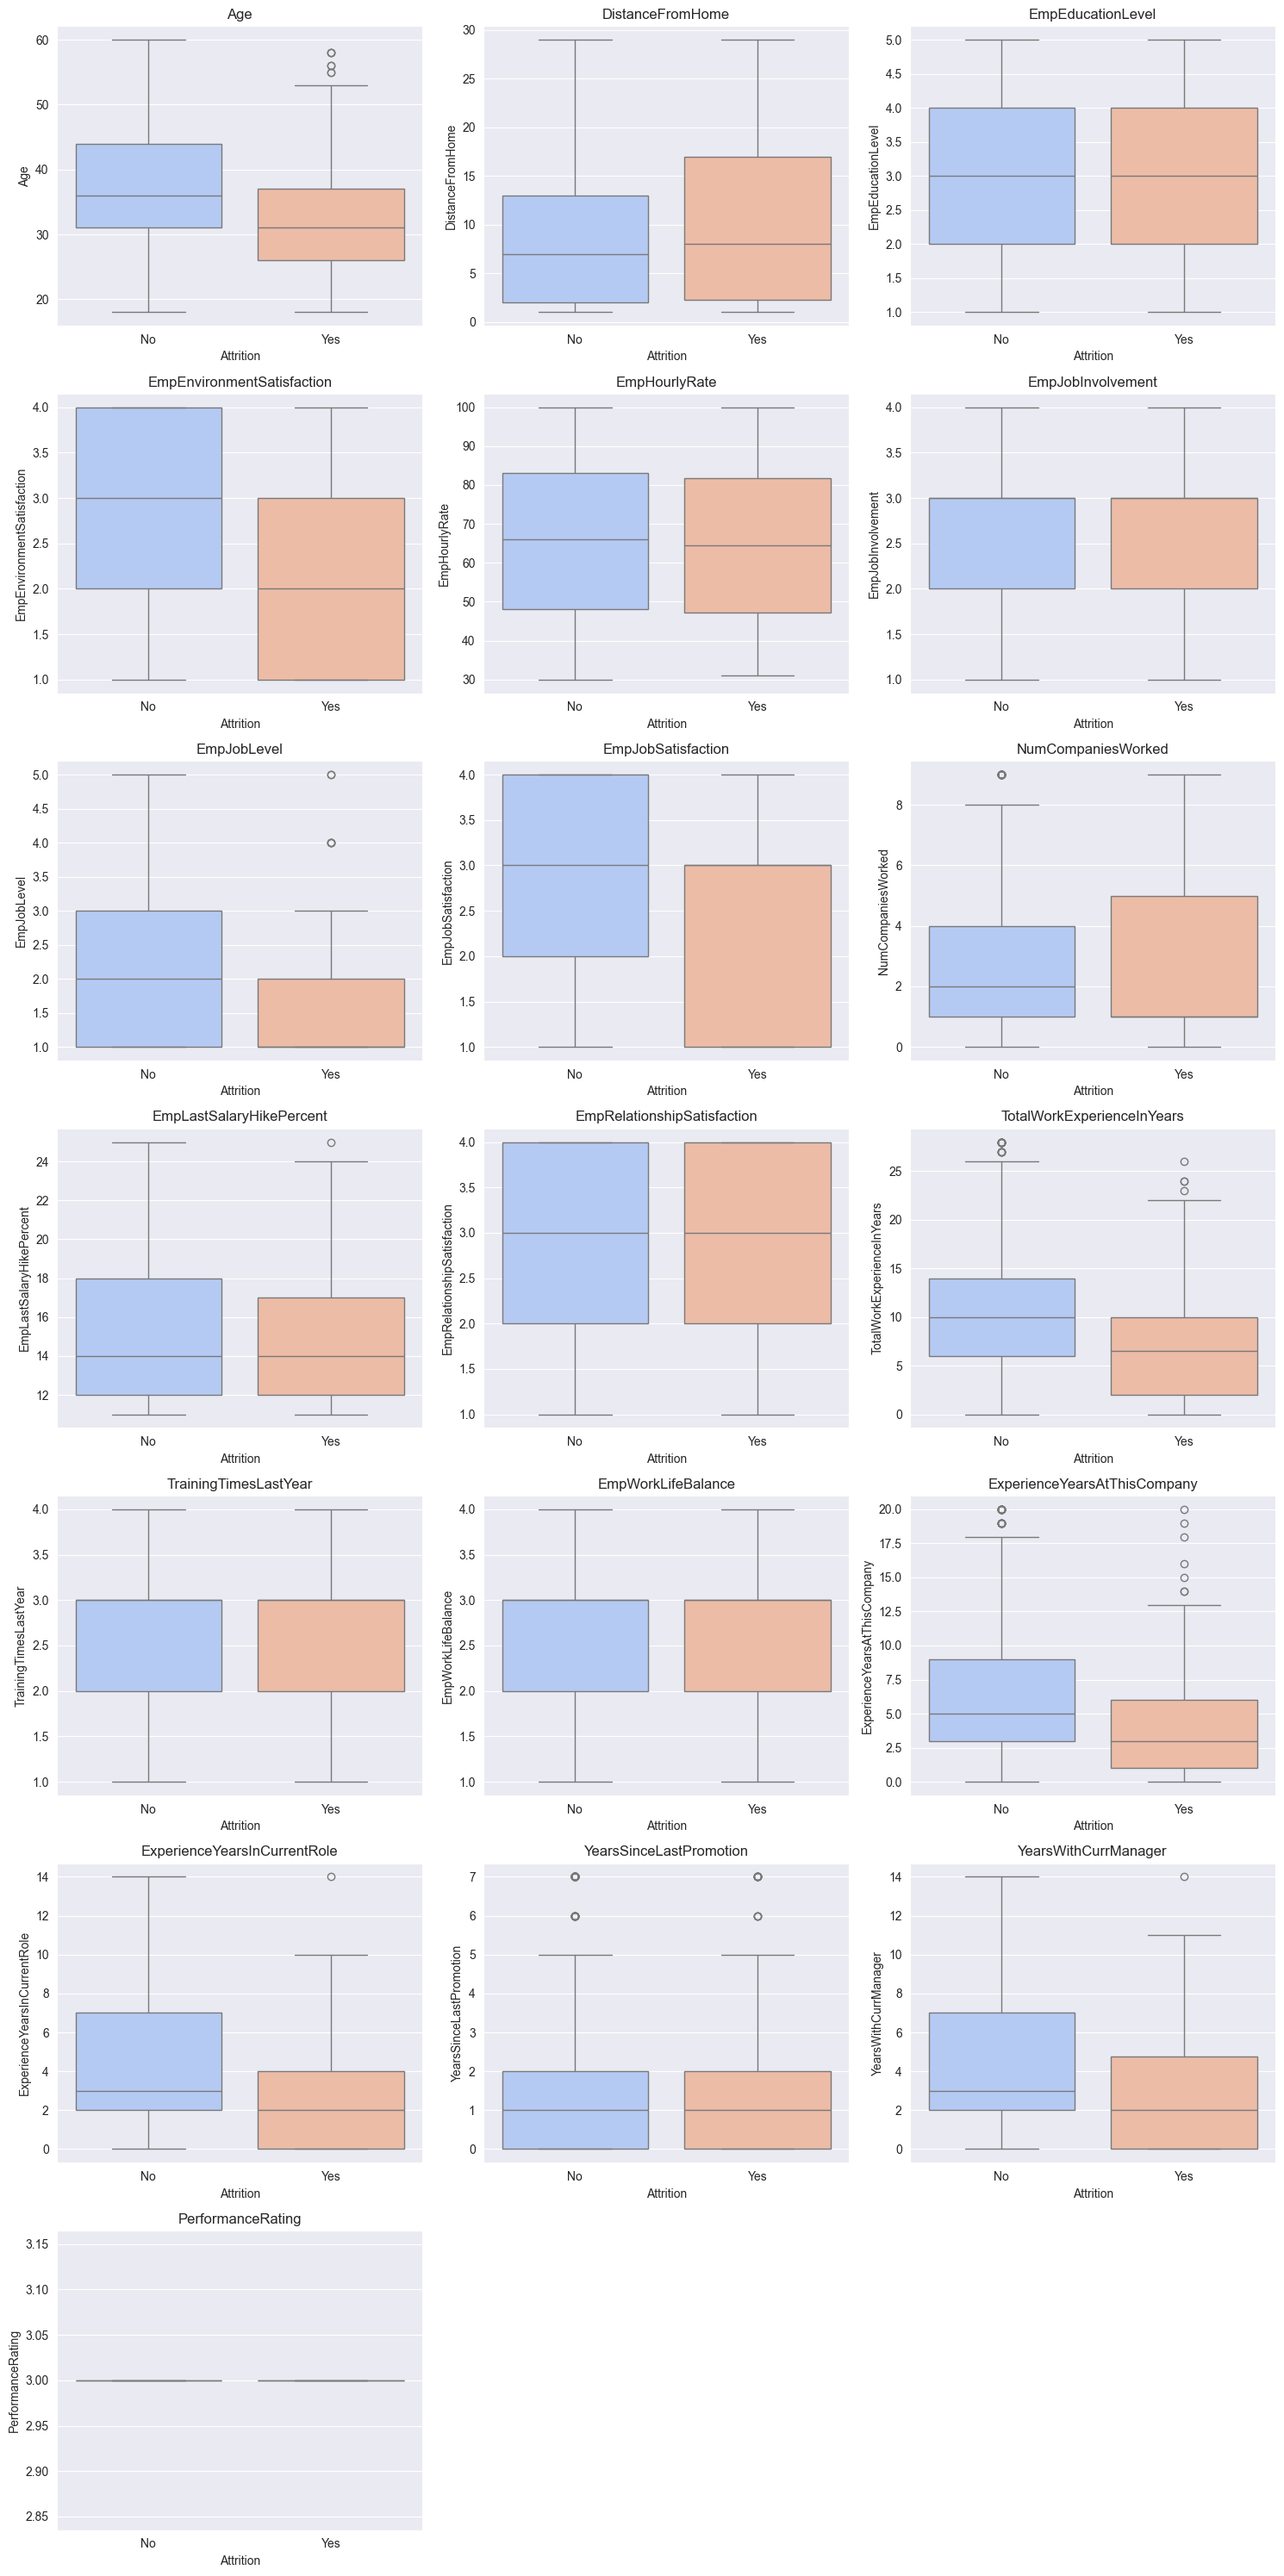

In [67]:
plt.figure(figsize= (15, 30))
sns.set_style('darkgrid')
n_cols = 3
n_rows = (len(numerical_data.columns) + n_cols - 1) // n_cols
plotnumber=1

for column in numerical_column:
    if plotnumber<=len(numerical_column):
        ax= plt.subplot(n_rows, n_cols, plotnumber)
        sns.boxplot(data= data, x= data['Attrition'], y= column, palette= 'coolwarm')
        ax.set_title(f'{column}')
      
    plotnumber+=1
plt.tight_layout()
plt.show()

<h4 style="font-size: 16px;"><b>Insights</b><h4>
<li style="font-size: 16px;">Thus the above plots imples that the outliers are hanled and procesed with median values of the column.</li>

In [68]:
## Encoding
## label encoder is used for ordinal data 
## one hot encoder is used for nominal data

In [69]:
data['Attrition'] = data.Attrition.replace({'Yes':1,'No':0})

In [70]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
BusinessTravel = encoder.fit_transform(data['BusinessTravelFrequency'])

data['BusinessTravelFrequency'] = pd.DataFrame(BusinessTravel)

In [71]:
Department = encoder.fit_transform(data['EmpDepartment'])
data['EmpDepartment'] = pd.DataFrame(Department)

In [72]:
EducationField = encoder.fit_transform(data['EmpEducationLevel'])
data['EmpEducationLevel'] = pd.DataFrame(EducationField)

In [73]:
data['Gender'] = data.Gender.replace({'Male':1,'Female':0})

In [74]:
JobRole = encoder.fit_transform(data['EmpJobRole'])
data['EmpJobRole'] = pd.DataFrame(JobRole)

In [75]:
MaritalStatus = encoder.fit_transform(data.MaritalStatus)
data['MaritalStatus'] = pd.DataFrame(MaritalStatus)

In [76]:
data['OverTime'] = data['OverTime'].replace({'Yes':1, 'No':0})

In [77]:
Education = encoder.fit_transform(data.EducationBackground)
data['EducationBackground'] = pd.DataFrame(Education)

In [78]:
data

EmpNumber  Age  Gender  EducationBackground  MaritalStatus  \
0     E1001000   32       1                    2              2   
1     E1001006   47       1                    2              2   
2     E1001007   40       1                    1              1   
3     E1001009   41       1                    0              0   
4     E1001010   60       1                    2              2   
...        ...  ...     ...                  ...            ...   
1195   E100992   27       0                    3              0   
1196   E100993   37       1                    1              2   
1197   E100994   50       1                    3              1   
1198   E100995   34       0                    3              2   
1199   E100998   24       0                    1              2   

      EmpDepartment  EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
0                 5          13                        2                10   
1                 5          13                        2                14   
2                 5          13                        1                 5   
3                 3           8                        2                10   
4                 5          13                        2                16   
...             ...         ...                      ...               ...   
1195              5          13                        1                 3   
1196              1          15                        2                10   
1197              1          15                        2                28   
1198              0           1                        2                 9   
1199              5          13                        2                 3   

      EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                     2  ...                            4   
1                     3  ...                            4   
2                     3  ...                            3   
3                     3  ...                            2   
4                     3  ...                            4   
...                 ...  ...                          ...   
1195                  0  ...                            2   
1196                  1  ...                            1   
1197                  0  ...                            3   
1198                  2  ...                            2   
1199                  1  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                             10                      2                   2   
1                             20                      2                   3   
2                             20                      2                   3   
3                             23                      2                   2   
4                             10                      1                   3   
...                          ...                    ...                 ...   
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                               10                             7   
1                                7                             7   
2                               18                            13   
3                                5                             6   
4                                2                             2   
...                            ...                           ...   
1195                             6                             5   
1196                             1   

<h4 style="font-size: 16px;"><b>Scaling</b></h4>

In [79]:
data.describe()

Age       Gender  EducationBackground  MaritalStatus  \
count  1200.000000  1200.000000           1200.00000    1200.000000   
mean     36.918333     0.604167              2.23500       1.096667   
std       9.087289     0.489233              1.31004       0.731050   
min      18.000000     0.000000              0.00000       0.000000   
25%      30.000000     0.000000              1.00000       1.000000   
50%      36.000000     1.000000              2.00000       1.000000   
75%      43.000000     1.000000              3.00000       2.000000   
max      60.000000     1.000000              5.00000       2.000000   

       EmpDepartment   EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
count    1200.000000  1200.000000              1200.000000       1200.000000   
mean        3.215000     9.039167                 1.595000          9.165833   
std         1.696911     4.754451                 0.679234          8.176636   
min         0.000000     0.000000                 0.000000          1.000000   
25%         1.000000     4.000000                 1.000000          2.000000   
50%         4.000000     9.000000                 2.000000          7.000000   
75%         5.000000    13.000000                 2.000000         14.000000   
max         5.000000    18.000000                 2.000000         29.000000   

       EmpEducationLevel  EmpEnvironmentSatisfaction  ...  \
count         1200.00000                 1200.000000  ...   
mean             1.89250                    2.715833  ...   
std              1.04412                    1.090599  ...   
min              0.00000                    1.000000  ...   
25%              1.00000                    2.000000  ...   
50%              2.00000                    3.000000  ...   
75%              3.00000                    4.000000  ...   
max              4.00000                    4.000000  ...   

       EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
count                  1200.000000                 1200.000000   
mean                      2.725000                   10.372500   
std                       1.075642                    6.366385   
min                       1.000000                    0.000000   
25%                       2.000000                    6.000000   
50%                       3.000000                   10.000000   
75%                       4.000000                   14.000000   
max                       4.000000                   28.000000   

       TrainingTimesLastYear  EmpWorkLifeBalance  \
count            1200.000000         1200.000000   
mean                2.617500            2.744167   
std                 0.702333            0.699374   
min                 1.000000            1.000000   
25%                 2.000000            2.000000   
50%                 3.000000            3.000000   
75%                 3.000000            3.000000   
max                 4.000000            4.000000   

       ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
count                   1200.000000                   1200.000000   
mean                       6.100000                      4.115833   
std                        4.493532                      3.339168   
min                        0.000000                      0.000000   
25%                        3.000000                      2.000000   
50%                        5.000000                      3.000000   
75%                        9.000000                      7.000000   
max                       20.000000                     14.000000   

       YearsSinceLastPromotion  YearsWithCurrManager    Attrition  \
count              1200.000000           1200.000000  1200.000000   
mean                  1.449167              3.983333     0.148333   
std                   1.916284              3.342758     0.355578   
min                   0.000000              0.000000     0.000000   
25%                   0.000000              2.000000     0.000000   
50% 

In [80]:
from sklearn.discriminant_analysis import StandardScaler

sclar = StandardScaler()
scaled_data = sclar.fit_transform(numerical_data)

In [81]:
data[['Age', 'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked', 'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear', 'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'PerformanceRating']] = scaled_data

In [82]:
data

EmpNumber       Age  Gender  EducationBackground  MaritalStatus  \
0     E1001000 -0.541458       1                    2              2   
1     E1001006  1.109888       1                    2              2   
2     E1001007  0.339260       1                    1              1   
3     E1001009  0.449349       1                    0              0   
4     E1001010  2.541054       1                    2              2   
...        ...       ...     ...                  ...            ...   
1195   E100992 -1.091906       0                    3              0   
1196   E100993  0.008991       1                    1              2   
1197   E100994  1.440157       1                    3              1   
1198   E100995 -0.321278       0                    3              2   
1199   E100998 -1.422176       0                    1              2   

      EmpDepartment  EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
0                 5          13                        2          0.102061   
1                 5          13                        2          0.591464   
2                 5          13                        1         -0.509693   
3                 3           8                        2          0.102061   
4                 5          13                        2          0.836165   
...             ...         ...                      ...               ...   
1195              5          13                        1         -0.754394   
1196              1          15                        2          0.102061   
1197              1          15                        2          2.304373   
1198              0           1                        2         -0.020290   
1199              5          13                        2         -0.754394   

      EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0              0.103000  ...                     1.185833   
1              1.061145  ...                     1.185833   
2              1.061145  ...                     0.255768   
3              1.061145  ...                    -0.674297   
4              1.061145  ...                     1.185833   
...                 ...  ...                          ...   
1195          -1.813288  ...                    -0.674297   
1196          -0.855144  ...                    -1.604362   
1197          -1.813288  ...                     0.255768   
1198           0.103000  ...                    -0.674297   
1199          -0.855144  ...                    -1.604362   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                      -0.170645              -0.622235           -1.064491   
1                       1.112397              -0.622235            0.365956   
2                       1.112397              -0.622235            0.365956   
3                       1.497310              -0.622235           -1.064491   
4                      -0.170645              -1.414051            0.365956   
...                          ...                    ...                 ...   
1195                   -0.683861               0.169581            0.365956   
1196                   -0.940470              -0.622235            0.365956   
1197                    1.112397               0.169581            0.365956   
1198                   -0.298949               0.169581            1.796403   
1199                   -0.940470               0.169581            0.365956   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                         0.468778                      0.749766   
1                        -0.012431                      0.749766   
2                         1.752001                      2.410786   
3                         2.233210                      0.472929   
4                        -0.814446                     -0.634417   
...                            ...                           ...   
1195                     -0.172834           

<h4 style='font-size: 16px;'><b>Feature Selection</b></h4>

In [83]:
## checking which columns have std dev=0 and remove that

stdev = []
for column in data.columns:
    if data[column].dtype == 'int64':
        if np.std(data[column])==0:
            stdev.append(column)

In [84]:
stdev

[]

<Axes: >

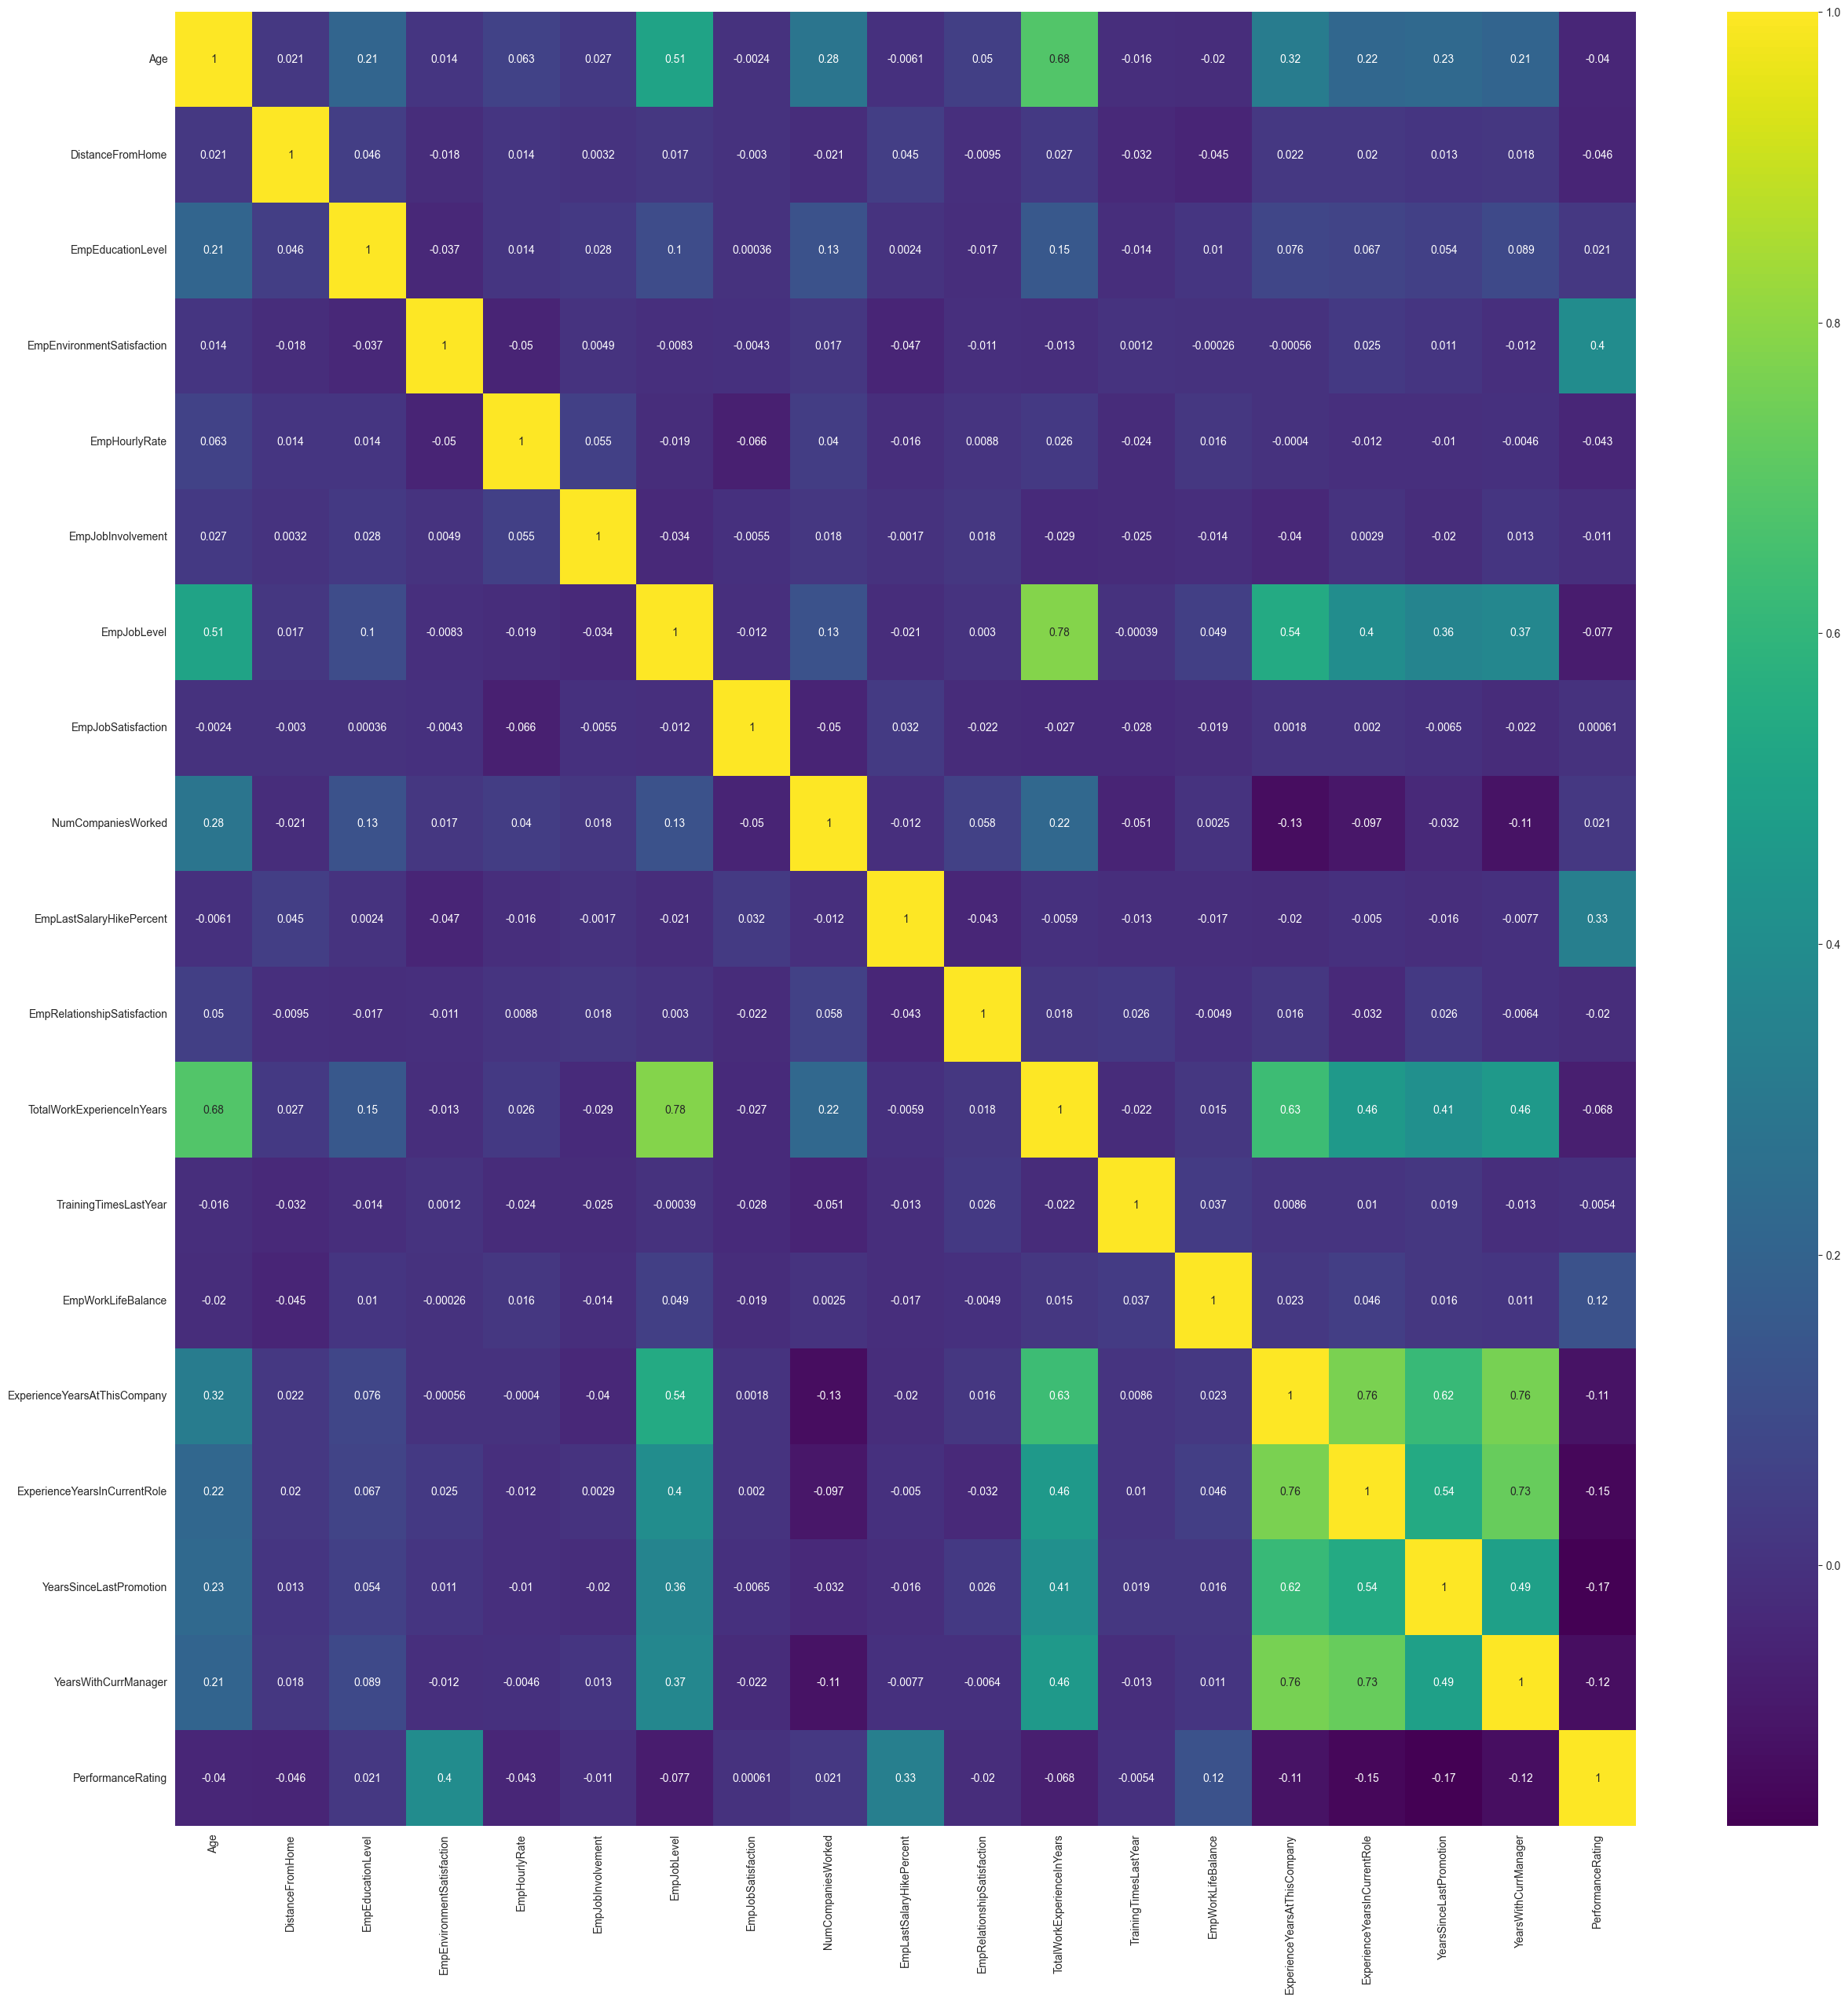

In [85]:
plt.figure(figsize=(30,30))
sns.heatmap(numerical_data.corr(),annot=True,cmap='viridis',annot_kws={'size':10})

<h4 style="font-size: 16px"><b>Splitting</b></h4>

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X = data.drop(['Attrition', 'EmpNumber'], axis=1)
y = data.Attrition

In [88]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
print("X trained data shape", x_train.shape)
print("X test data shape", x_test.shape)
print("Y train data shape", y_train.shape)
print("Y test data split", y_test.shape)

X trained data shape (960, 26)
X test data shape (240, 26)
Y train data shape (960,)
Y test data split (240,)


<h4 style="font-size: 16px"><b>Model Implementation</b></h4>

In [90]:
final_result_data = []

<h4 style="font-size: 16px"><b>Logistic Regression</b></h4>

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [92]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

LogisticRegression()

In [93]:
y_prediction_logistic = logistic_model.predict(x_test)
y_prediction_logistic

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [94]:
# Accuracy score for the test data
accuracy_score_test_data = accuracy_score(y_test, y_prediction_logistic)
print(f'Accuracy Score is: {accuracy_score_test_data*100}%')

Accuracy Score is: 87.5%


In [95]:
# confusion_matrix for the test data
confusion_matrix(y_test, y_prediction_logistic)

array([[200,   5],
       [ 25,  10]], dtype=int64)

In [96]:
# classification_report for the test data
print(classification_report(y_test, y_prediction_logistic))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       205
           1       0.67      0.29      0.40        35

    accuracy                           0.88       240
   macro avg       0.78      0.63      0.67       240
weighted avg       0.86      0.88      0.85       240



In [97]:
pd.crosstab(y_test, y_prediction_logistic)

col_0        0   1
Attrition         
0          200   5
1           25  10

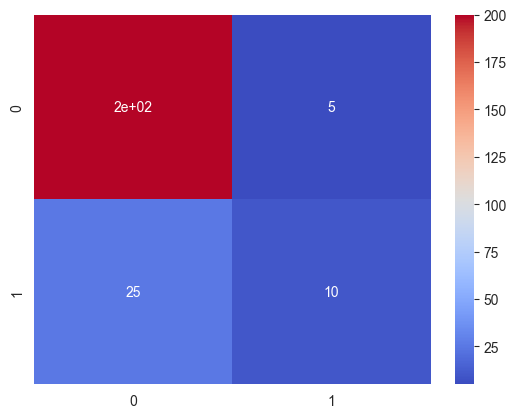

In [98]:
sns.heatmap(confusion_matrix(y_test, y_prediction_logistic), annot=True, cmap='coolwarm')
plt.show()

In [99]:
# Performance metrics

'''Defining a function to calculate all the required performance metrics
for the given model'''
def metrics_calculator(y_test, y_pred, model_name):
    result= pd.DataFrame(data= [accuracy_score(y_test, y_pred),
                            precision_score(y_test, y_pred, average= 'macro'),
                            recall_score(y_test, y_pred, average= 'macro'),
                            f1_score(y_test, y_pred, average= 'macro')],
                            index=['Accuracy','precision','Recall', 'F1-score'],
                            columns= [model_name]
                        )
    return result

In [100]:
Base_LR_result = metrics_calculator(y_test, y_prediction_logistic, 'Base Logistic Regression')
Base_LR_result

Base Logistic Regression
Accuracy                   0.875000
precision                  0.777778
Recall                     0.630662
F1-score                   0.665116

<h4 style="font-size: 16px;"><b>HyperParameter Tunning For Logistic Regression</b></h4>

In [101]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

grid_search_for_logistic = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_for_logistic.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [102]:
# Get the best hyperparameters
best_params = grid_search_for_logistic.best_params_

# Get the best model
best_model = grid_search_for_logistic.best_estimator_

# Evaluate the best model
best_score = grid_search_for_logistic.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

Best Hyperparameters: {'C': 1, 'max_iter': 300, 'penalty': 'l1', 'solver': 'saga'}
Best Score: 0.8760416666666668


In [103]:
best_model.fit(x_train, y_train)
y_prediction_logistic_after_tunning = best_model.predict(x_test)

In [104]:
accuracy_score_after_LR_tunning = accuracy_score(y_test, y_prediction_logistic_after_tunning)
print("Accuracy After tunning LR Model", accuracy_score_after_LR_tunning * 100)

Accuracy After tunning LR Model 88.33333333333333


In [105]:
print("confusion_matrix after tuning:")
confusion_matrix(y_test, y_prediction_logistic_after_tunning)

confusion_matrix after tuning:


array([[202,   3],
       [ 25,  10]], dtype=int64)

In [106]:
print("Classification Report after tunning:")
print(classification_report(y_test, y_prediction_logistic_after_tunning))

Classification Report after tunning:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       205
           1       0.77      0.29      0.42        35

    accuracy                           0.88       240
   macro avg       0.83      0.64      0.68       240
weighted avg       0.87      0.88      0.86       240



In [107]:
print("Cross Tab after tuning:")
pd.crosstab(y_test, y_prediction_logistic_after_tunning)

Cross Tab after tuning:


col_0        0   1
Attrition         
0          202   3
1           25  10

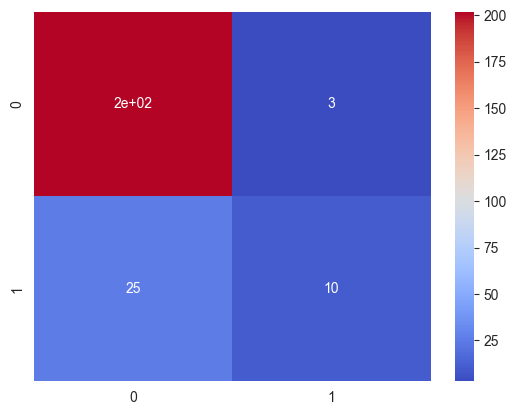

In [108]:
sns.heatmap(confusion_matrix(y_test, y_prediction_logistic_after_tunning), annot=True, cmap='coolwarm')
plt.show()

In [109]:
LR_Model_after_tunning = metrics_calculator(y_test, y_prediction_logistic_after_tunning, 'Logistic Regression after tunning.')
LR_Model_after_tunning

Logistic Regression after tunning.
Accuracy                             0.883333
precision                            0.829549
Recall                               0.635540
F1-score                             0.675926

<h4 style="font-size: 16px;"><b>Decission Tree</b></h4>

In [110]:
y_train.value_counts()

Attrition
0    817
1    143
Name: count, dtype: int64

In [111]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_sm,y_train_sm = smote.fit_resample(x_train,y_train)

In [112]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_train_sm))

Counter({0: 817, 1: 143})
Counter({0: 817, 1: 817})


In [113]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(x_train_sm,y_train_sm)

DecisionTreeClassifier()

In [114]:
y_pred_dt = model_dt.predict(x_test)

In [115]:
accuracy_score(y_test,y_pred_dt)

0.8041666666666667

In [116]:
confusion_matrix(y_test,y_pred_dt)

array([[179,  26],
       [ 21,  14]], dtype=int64)

In [117]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       205
           1       0.35      0.40      0.37        35

    accuracy                           0.80       240
   macro avg       0.62      0.64      0.63       240
weighted avg       0.82      0.80      0.81       240



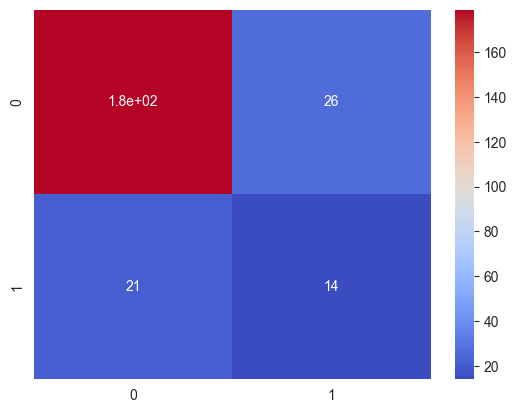

In [118]:
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, cmap='coolwarm')
plt.show()

In [119]:
Base_DT_result = metrics_calculator(y_test, y_pred_dt, 'Base Decission Tree')
Base_DT_result

Base Decission Tree
Accuracy              0.804167
precision             0.622500
Recall                0.636585
F1-score              0.628642

<h4 style="font-size: 16px;"><b>HyperParameter Tunning For Decission Tree</b></h4>

In [120]:
# Define the parameter grid
param_grid = {
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [20, 30, 40],
    'min_samples_leaf': [10, 20, 30, 40],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model_dt, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

grid_search.fit(x_train_sm, y_train_sm)
best_params = grid_search.best_params_

print(f'Best parameters: {best_params}')

Best parameters: {'criterion': 'entropy', 'max_depth': 40, 'min_samples_leaf': 10, 'min_samples_split': 20}


In [121]:
model_dt_after_tuning = DecisionTreeClassifier(criterion=best_params['criterion'], max_depth=best_params['max_depth'], min_samples_leaf=best_params['min_samples_split'], min_samples_split=best_params['min_samples_split'])
model_dt_after_tuning.fit(x_train_sm, y_train_sm)

DecisionTreeClassifier(criterion='entropy', max_depth=40, min_samples_leaf=20,
                       min_samples_split=20)

In [122]:
y_prediction_after_dt_tuning = model_dt_after_tuning.predict(x_test)
y_prediction_after_dt_tuning

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [123]:
accuracy_score_after_dt_tunning = accuracy_score(y_test, y_prediction_after_dt_tuning)
print(f'Accuracy after Hyper parameter tunning: {accuracy_score_after_dt_tunning * 100}%')

Accuracy after Hyper parameter tunning: 79.58333333333333%


In [124]:
print('Confusion Matrix after tunning:')
confusion_matrix(y_test, y_prediction_after_dt_tuning)

Confusion Matrix after tunning:


array([[183,  22],
       [ 27,   8]], dtype=int64)

In [125]:
print(f'Classification Report Matrix after tuning:')
print(classification_report(y_test, y_prediction_after_dt_tuning))

Classification Report Matrix after tuning:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       205
           1       0.27      0.23      0.25        35

    accuracy                           0.80       240
   macro avg       0.57      0.56      0.56       240
weighted avg       0.78      0.80      0.79       240



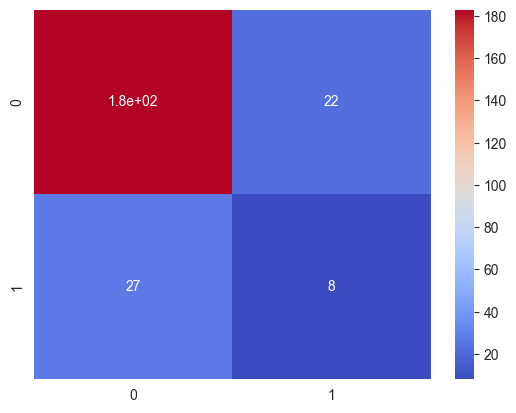

In [126]:
sns.heatmap(confusion_matrix(y_test, y_prediction_after_dt_tuning), annot=True, cmap='coolwarm')
plt.show()

In [127]:
DT_Model_after_tuning = metrics_calculator(y_test, y_prediction_after_dt_tuning, 'Decision Tree After Tunning')
DT_Model_after_tuning

Decision Tree After Tunning
Accuracy                      0.795833
precision                     0.569048
Recall                        0.560627
F1-score                      0.564041

<h4 style="font-size: 16px;"><b>Random Forest Tree</b></h4>

In [128]:
from sklearn.ensemble import RandomForestClassifier

In [129]:
random_classifier = RandomForestClassifier()
random_classifier.fit(x_train_sm, y_train_sm)

RandomForestClassifier()

In [130]:
y_random_prediction = random_classifier.predict(x_test)

In [131]:
random_classifier_accuracy = accuracy_score(y_test, y_random_prediction)
print(f'Accuracy after Random Forest is {random_classifier_accuracy * 100}%')

Accuracy after Random Forest is 88.75%


In [132]:
confusion_matrix(y_test, y_random_prediction)

array([[203,   2],
       [ 25,  10]], dtype=int64)

In [133]:
print(classification_report(y_test, y_random_prediction))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       205
           1       0.83      0.29      0.43        35

    accuracy                           0.89       240
   macro avg       0.86      0.64      0.68       240
weighted avg       0.88      0.89      0.86       240



In [134]:
print("Cross Tab:")
pd.crosstab(y_test, y_random_prediction)

Cross Tab:


col_0        0   1
Attrition         
0          203   2
1           25  10

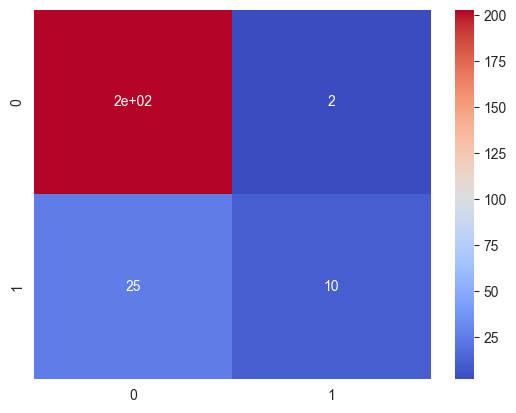

In [135]:
sns.heatmap(confusion_matrix(y_test, y_random_prediction), annot=True, cmap='coolwarm')
plt.show()

In [136]:
Base_RCL_result = metrics_calculator(y_test, y_random_prediction, 'Base Random Forest')
Base_RCL_result

Base Random Forest
Accuracy             0.887500
precision            0.861842
Recall               0.637979
F1-score             0.681588

In [137]:
# Perform GridSearchCV for Random Forest Model

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
random_classifier_grid_search = GridSearchCV(estimator=random_classifier, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
random_classifier_grid_search.fit(x_train_sm, y_train_sm)

print("Best Parameters:", random_classifier_grid_search.best_params_)

Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [138]:
rcl_after_tunning = RandomForestClassifier(bootstrap=random_classifier_grid_search.best_params_['bootstrap'], max_depth=random_classifier_grid_search.best_params_['max_depth'], min_samples_split=random_classifier_grid_search.best_params_['min_samples_split'], max_features=random_classifier_grid_search.best_params_['max_features'], min_samples_leaf=random_classifier_grid_search.best_params_['min_samples_leaf'], n_estimators=random_classifier_grid_search.best_params_['n_estimators'])
rcl_after_tunning.fit(x_train_sm, y_train_sm)

RandomForestClassifier(bootstrap=False, max_features='log2')

In [139]:
y_prediction_after_tuning_rcl = rcl_after_tunning.predict(x_test)
y_prediction_after_tuning_rcl

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [140]:
# Accuracy for Random Classifier after Tunning
accuracy_score_after_tunning_rcl = accuracy_score(y_test, y_prediction_after_tuning_rcl)
print(f'Accuracy after Hyper parameter tunning: {accuracy_score_after_tunning_rcl * 100}%')

Accuracy after Hyper parameter tunning: 88.33333333333333%


In [141]:
print('Confusion Matrix after tuning:')
confusion_matrix(y_test, y_prediction_after_tuning_rcl)

Confusion Matrix after tuning:


array([[204,   1],
       [ 27,   8]], dtype=int64)

In [142]:
print('Classification Report after tunning:')
print(classification_report(y_test, y_prediction_after_tuning_rcl))

Classification Report after tunning:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       205
           1       0.89      0.23      0.36        35

    accuracy                           0.88       240
   macro avg       0.89      0.61      0.65       240
weighted avg       0.88      0.88      0.85       240



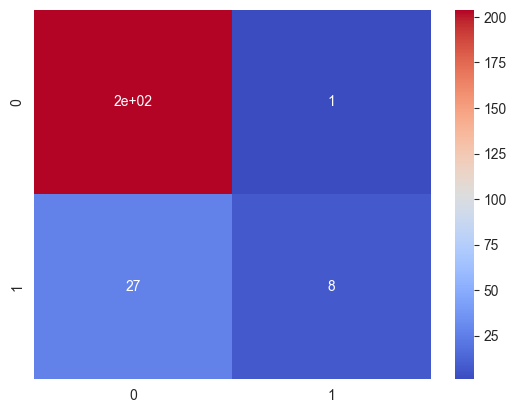

In [143]:
sns.heatmap(confusion_matrix(y_test, y_prediction_after_tuning_rcl), annot=True, cmap='coolwarm')
plt.show()

In [144]:
print("Cross Tab after tuning:")
pd.crosstab(y_test, y_prediction_after_tuning_rcl)

Cross Tab after tuning:


col_0        0  1
Attrition        
0          204  1
1           27  8

In [145]:
rcl_after_tunning_results = metrics_calculator(y_test, y_prediction_after_tuning_rcl, 'RandomForest Classifier Results after tuning')
rcl_after_tunning_results

RandomForest Classifier Results after tuning
Accuracy                                       0.883333
precision                                      0.886003
Recall                                         0.611847
F1-score                                       0.649708

In [146]:
from sklearn.svm import SVC

svm_model= SVC(probability= True)

# fitting the model to the training set
svm_model.fit(x_train, y_train)

SVC(probability=True)

In [147]:
# prediction

y_pred_svm = svm_model.predict(x_test)
y_pred_svm

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [148]:
# checking accuracy score
accuracy_score(y_test, y_pred_svm)

0.8541666666666666

In [149]:
confusion_matrix(y_test, y_pred_svm)

array([[205,   0],
       [ 35,   0]], dtype=int64)

In [150]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       205
           1       0.00      0.00      0.00        35

    accuracy                           0.85       240
   macro avg       0.43      0.50      0.46       240
weighted avg       0.73      0.85      0.79       240



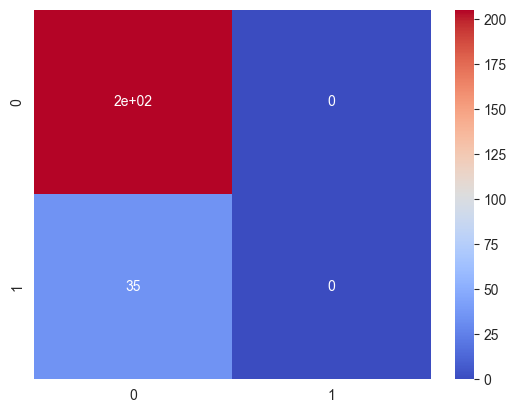

In [151]:
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, cmap='coolwarm')
plt.show()

In [152]:
print("Cross Tab :")
pd.crosstab(y_test, y_pred_svm)

Cross Tab :


col_0        0
Attrition     
0          205
1           35

In [153]:
base_model_smv_results = metrics_calculator(y_test, y_pred_svm, 'Base Model Support Vector Machine')
base_model_smv_results

Base Model Support Vector Machine
Accuracy                            0.854167
precision                           0.427083
Recall                              0.500000
F1-score                            0.460674

In [154]:
# Importing the required libraries
from sklearn.svm import SVC
from scipy.stats import uniform

# Defining model
model_svm = SVC()

# Defining search parameters
C = uniform(0.1, 10)
kernel = ['linear', 'rbf']
gamma = ['scale', 'auto']

In [155]:
param_grid= {'C': C, 'kernel': kernel, 'gamma': gamma}

# Defining search
from sklearn.model_selection import RandomizedSearchCV
search = RandomizedSearchCV(model_svm, param_grid, scoring = 'accuracy', n_jobs= -1, cv= 5, n_iter=10)

# Executing search
RandomizedSearchCV = search.fit(x_train, y_train)

# Setting the classifier to the best combination of parameters
svm_model_cv= RandomizedSearchCV.best_estimator_

# Summarizing the result
print('Best Score: ', RandomizedSearchCV.best_score_)
print('Best hyperparameters: ', RandomizedSearchCV.best_params_)

Best Score:  0.8739583333333334
Best hyperparameters:  {'C': 5.971490763179051, 'gamma': 'scale', 'kernel': 'rbf'}


In [156]:
y_pred_after_svm_tunning = svm_model_cv.predict(x_test)
y_pred_after_svm_tunning

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [157]:
accuracy_score(y_test, y_pred_after_svm_tunning)

0.8583333333333333

In [158]:
print('Confusion Matrix after svm tunning:')
confusion_matrix(y_test, y_pred_after_svm_tunning)

Confusion Matrix after svm tunning:


array([[200,   5],
       [ 29,   6]], dtype=int64)

In [159]:
print('classification_report after svm tunning:')
print(classification_report(y_test, y_pred_after_svm_tunning))

classification_report after svm tunning:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       205
           1       0.55      0.17      0.26        35

    accuracy                           0.86       240
   macro avg       0.71      0.57      0.59       240
weighted avg       0.83      0.86      0.83       240



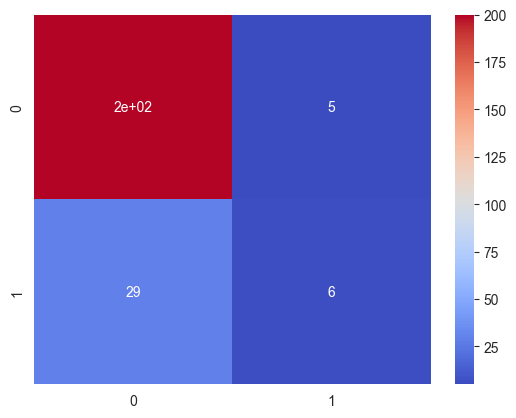

In [160]:
sns.heatmap(confusion_matrix(y_test, y_pred_after_svm_tunning), annot=True, cmap='coolwarm')
plt.show()

In [161]:
print("Cross Tab after tuning:")
pd.crosstab(y_test, y_pred_after_svm_tunning)

Cross Tab after tuning:


col_0        0  1
Attrition        
0          200  5
1           29  6

In [162]:
svm_model_results_after_tunning = metrics_calculator(y_test, y_pred_after_svm_tunning, 'SVM after Tunning')
svm_model_results_after_tunning

SVM after Tunning
Accuracy            0.858333
precision           0.709408
Recall              0.573519
F1-score            0.591264

In [163]:
# Department wise performances

# First, reverse the encoding to get original department names
data['OriginalEmpDepartment'] = encoder.inverse_transform(data['EmpDepartment'])

# Now, calculate the department performance using the original department names
department_performance = data.groupby('OriginalEmpDepartment')['PerformanceRating'].mean().sort_values(ascending=False)
print(department_performance)

OriginalEmpDepartment
Life Sciences       0.265187
Human Resources     0.196022
Medical            -0.043203
Other              -0.052156
Technical Degree   -0.169177
Marketing          -0.333218
Name: PerformanceRating, dtype: float64


In [164]:
# Top 3 Important Factors Affecting Employee Performance

importances = pd.Series(random_classifier.feature_importances_, index=X.columns)
top_3_factors = importances.nlargest(3)
print(top_3_factors)

EmpJobInvolvement             0.083702
EmpJobLevel                   0.082726
EmpEnvironmentSatisfaction    0.059797
dtype: float64


In [165]:
# A Trained Model to Predict Employee Performance.
# Comparing all the model implementations we can conclude that the Random Forest model predicts 88% of accuracy.
# Other than all the models. 

# new_prediction = random_classifier.predict()